### Installing libraries

In [ ]:
library(ggplot2)
library(jsonlite)
library(data.table)
library(asreml)
library(dplyr)

### Reading in files, converting variable types

In [ ]:
# Datasets for ASREML-R models
phenotype <- read.csv("updated_data_2013_2014.csv", header=T)
phenotype$dam <- as.factor(phenotype$dam)
phenotype$sire <- as.factor(phenotype$sire)
phenotype$year <- as.factor(phenotype$year)
phenotype$hybrid <- as.factor(phenotype$hybrid)
# phenotype$egg_mass <- as.numeric(levels(phenotype$egg_mass))[phenotype$egg_mass]
# phenotype$egg_diameter <- as.numeric(levels(phenotype$egg_diameter))[phenotype$egg_diameter]
phenotype$temp <- as.factor(phenotype$temp)

# Converting empty cells to NA, omitting NAs from dataset
phenotype[phenotype==""] <- NA
phenotype <- na.omit(phenotype)

# Dataset for reaction norm figures
grouped_data <- phenotype %>% group_by(sire, temp) %>% summarize(pct.male = mean(sex == "1"))
grouped_data$temp <- as.factor(grouped_data$temp)
grouped_data$sire <- as.factor(grouped_data$sire)
grouped_data$temp = as.numeric(as.character(grouped_data$temp))

### Trait analyses

**1. Egg mass**

In [ ]:
model.1 <- asreml(fixed = egg_mass ~ hybrid, random = ~year + sire + sire/dam, data=phenotype)
model.2 <- asreml(fixed = egg_mass ~ hybrid, random = ~year + sire, data=phenotype)
model.3 <- asreml(fixed = egg_mass ~ hybrid, random = ~year + sire/dam, data=phenotype)
model.4 <- asreml(fixed = egg_mass ~ hybrid, random = ~sire + sire/dam, data=phenotype)

# Likelihood ratio tests for testing random effect significance
paste0(2 * (model.1$loglik - model.2$loglik))
paste0(2 * (model.1$loglik - model.3$loglik))
paste0(2 * (model.1$loglik - model.4$loglik))

# Wald test for fixed effect significance
wald(model.1, denDF="numeric", ssType="conditional")

# Calculate narrow-sense heritability (h2) from basic.1 model
# h2 = (4 * sire variance) / (total variance)
vpredict(egg_mass_model, heritability ~4*V2 / (V1 + V2 + V3 + V4))

# calculate maximum maternal effects (m2) from basic.1 model
# assuming dominance variation (d2) = 0, m2max = dam[sire] - sire 
vpredict(model.1, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

**2. Egg diameter**

In [ ]:
# Running ASREML-R models
model.1 <- asreml(fixed = egg_diameter ~ hybrid, random = ~year + sire + sire/dam, data=phenotype)
model.2 <- asreml(fixed = egg_diameter ~ hybrid, random = ~year + sire, data=phenotype)
model.3 <- asreml(fixed = egg_diameter ~ hybrid, random = ~year + sire/dam, data=phenotype)
model.4 <- asreml(fixed = egg_diameter ~ hybrid, random = ~sire + sire/dam, data=phenotype)

# Likelihood ratio tests for testing random effect significance
paste0(2 * (model.1$loglik - model.2$loglik))
paste0(2 * (model.1$loglik - model.3$loglik))
paste0(2 * (model.1$loglik - model.4$loglik))

# Wald test for fixed effect significance
wald(model.1, denDF="numeric", ssType="conditional")

# Calculate narrow-sense heritability (h2) from basic.1 model
# h2 = (4 * sire variance) / (total variance)
vpredict(model.1, heritability ~4*V2 / (V1 + V2 + V3 + V4))

# calculate maximum maternal effects (m2) from basic.1 model
# assuming dominance variation (d2) = 0, m2max = dam[sire] - sire 
vpredict(model.1, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

**3. Hatchling mass**

In [ ]:
# Running ASREML-R models
# The tempeature main effect as well as genotype x temperature interactions are present in models

# Running ASREML-R models
model.1 <- asreml(fixed = hatch_mass ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
model.2 <- asreml(fixed = hatch_mass ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp, data=phenotype)
model.3 <- asreml(fixed = hatch_mass ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire/dam:temp, data=phenotype)
model.4 <- asreml(fixed = hatch_mass ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire:temp + sire/dam:temp, data=phenotype)
model.5 <- asreml(fixed = hatch_mass ~ hybrid + hybrid:temp + temp, random = ~year + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
model.6 <- asreml(fixed = hatch_mass ~ hybrid + hybrid:temp + temp, random = ~sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)

# Likelihood ratio tests for testing random effect significance
paste0(2 * (model.1$loglik - model.2$loglik))
paste0(2 * (model.1$loglik - model.3$loglik))
paste0(2 * (model.1$loglik - model.4$loglik))
paste0(2 * (model.1$loglik - model.5$loglik))
paste0(2 * (model.1$loglik - model.6$loglik))

# Wald test for fixed effect significance
wald(model.1, denDF="numeric", ssType="conditional")

# Calculating h2 and m2 at individual temperatures
# 22 degree models, year is not a variable

# Removing 22.5, 26, 27, and 28 degree temperatures from dataset
phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

model.22.A <- asreml(fixed = hatch_mass ~ hybrid, random = ~sire + sire/dam, data=phenotypeA) 
model.22.B <- asreml(fixed = hatch_mass ~ hybrid, random = ~sire, data=phenotypeA) 
model.22.C <- asreml(fixed = hatch_mass ~ hybrid, random = ~sire/dam, data=phenotypeA) 

# paste0(2 * (model.22.A$loglik - model.22.B$loglik))
# paste0(2 * (model.22.A$loglik - model.22.C$loglik))

# vpredict(model.22.A, heritability ~4*V1 / (V1 + V2 + V3))
# vpredict(model.22.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# 22.5 degree models, year is not an effect

# Removing 22, 26, 27, and 28 degree temperatures 
# phenotypeE <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.5.A <- asreml(fixed = hatch_mass ~ hybrid, random = ~sire + sire/dam, data=phenotypeE)
# model.22.5.B <- asreml(fixed = hatch_mass ~ hybrid, random = ~sire, data=phenotypeE)
# model.22.5.C <- asreml(fixed = hatch_mass ~ hybrid, random = ~sire/dam, data=phenotypeE)

# paste0(2 * (model.22.5.A$loglik - model.22.5.B$loglik))
# paste0(2 * (model.22.5.A$loglik - model.22.5.C$loglik))

# vpredict(model.22.5.A, heritability ~4*V1 / (V1 + V2 + V3))
# vpredict(model.22.5.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# 26 degree models
# Removing 22, 22.5, 27 and 28 degree temperatures 
# phenotypeB <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==27 | phenotype$temp==28),]

# model.26.A <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeB)
# model.26.B <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire, data=phenotypeB)
# model.26.C <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire/dam, data=phenotypeB)

# paste0(2 * (model.26.A$loglik - model.26.B$loglik))
# paste0(2 * (model.26.A$loglik - model.26.C$loglik))

# # summary(model.26.A)$varcomp


# # vpredict(model.26.A, heritability ~4*V2 / (V1 + V2 + V3 + V4)) 
# # vpredict(model.26.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# # 27 degree models
# # Removing 22, 22.5, 26 and 28 degree temperatures 
# phenotypeC <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==28),]

# model.27.A <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeC)
# model.27.B <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire, data=phenotypeC)
# model.27.C <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire/dam, data=phenotypeC)

# paste0(2 * (model.27.A$loglik - model.27.B$loglik))
# paste0(2 * (model.27.A$loglik - model.27.C$loglik))

# # summary(model.27.A)$varcomp

# # vpredict(model.27.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # vpredict(model.27.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))


# # 28 degree models
# # # Removing 22, 22.5, 26 and 27 degree temperatures 
# phenotypeD <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==27),]

# model.28.A <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeD)
# model.28.B <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire, data=phenotypeD)
# model.28.C <- asreml(fixed = hatch_mass ~ hybrid, random = ~year + sire/dam, data=phenotypeD)

# paste0(2 * (model.28.A$loglik - model.28.B$loglik))
# paste0(2 * (model.28.A$loglik - model.28.C$loglik))

# # summary(model.28.A)$varcomp


# # vpredict(model.28.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # vpredict(model.28.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

**4. Hatchling carapace length**

In [ ]:
# Running ASREML-R models
model.1 <- asreml(fixed = hatch_cl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
model.2 <- asreml(fixed = hatch_cl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp, data=phenotype)
# # model.3 <- asreml(fixed = hatch_cl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire/dam:temp, data=phenotype)
# # model.4 <- asreml(fixed = hatch_cl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire:temp + sire/dam:temp, data=phenotype)
# # model.5 <- asreml(fixed = hatch_cl ~ hybrid + hybrid:temp + temp, random = ~year + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
# # model.6 <- asreml(fixed = hatch_cl ~ hybrid + hybrid:temp + temp, random = ~sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)

# # paste0(2 * (model.1$loglik - model.2$loglik))
# # paste0(2 * (model.1$loglik - model.3$loglik))
# # paste0(2 * (model.1$loglik - model.4$loglik))
# # paste0(2 * (model.1$loglik - model.5$loglik))
# # paste0(2 * (model.1$loglik - model.6$loglik))

# # wald(hatch_CL_model, denDF="numeric", ssType="conditional")




# # # 22 degree models, no year effect
# # # Removing 22.5, 26, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp=="shift" | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.A <- asreml(fixed = hatch_cl ~ hybrid, random = ~sire + sire/dam, data=phenotypeA) 
# # model.22.B <- asreml(fixed = hatch_cl ~ hybrid, random = ~sire, data=phenotypeA) 
# # model.22.C <- asreml(fixed = hatch_cl ~ hybrid, random = ~sire/dam, data=phenotypeA)

# # paste0(2 * (model.22.A$loglik - model.22.B$loglik))
# # paste0(2 * (model.22.A$loglik - model.22.C$loglik)) 

# summary(model.22.A)$varcomp

# # vpredict(model.22.A, heritability ~4*V1 / (V1 + V2 + V3))
# # vpredict(model.22.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# # 22.5 degree models, no year effect

# # Removing 22, 26, 27, and 28 degree temperatures 

# phenotypeE <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.5.A <- asreml(fixed = hatch_cl ~ hybrid, random = ~sire + sire/dam, data=phenotypeE)
# # model.22.5.B <- asreml(fixed = hatch_cl ~ hybrid, random = ~sire, data=phenotypeE)
# # model.22.5.C <- asreml(fixed = hatch_cl ~ hybrid, random = ~sire/dam, data=phenotypeE)

# # paste0(2 * (model.22.5.A$loglik - model.22.5.B$loglik))
# # paste0(2 * (model.22.5.A$loglik - model.22.5.C$loglik))

# # # # vpredict(model.22.5.A, heritability ~4*V1 / (V1 + V2 + V3))
# # # # vpredict(model.22.5.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# summary(model.22.5.A)$varcomp


# # 26 degree models
# # Removing 22, 22.5, 27 and 28 degree temperatures 
# phenotypeB <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==27 | phenotype$temp==28),]

# model.26.A <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeB)
# # model.26.B <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire, data=phenotypeB)
# # model.26.C <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire/dam, data=phenotypeB)

# # paste0(2 * (model.26.A$loglik - model.26.B$loglik))
# # paste0(2 * (model.26.A$loglik - model.26.C$loglik))

# # # # vpredict(model.26.A, heritability ~4*V2 / (V1 + V2 + V3 + V4)) 
# # # # vpredict(model.26.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# summary(model.26.A)$varcomp


# # 27 degree models
# # Removing 22, 22.5, 26 and 28 degree temperatures 
# phenotypeC <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==28),]

# model.27.A <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeC)
# # model.27.B <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire, data=phenotypeC)
# # model.27.C <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire/dam, data=phenotypeC)

# # paste0(2 * (model.27.A$loglik - model.27.B$loglik))
# # paste0(2 * (model.27.A$loglik - model.27.C$loglik))

# # # # vpredict(model.27.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # # # vpredict(model.27.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# summary(model.27.A)$varcomp


# # 28 degree models
# # # Removing 22, 22.5, 26 and 27 degree temperatures 
# phenotypeD <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==27),]

# model.28.A <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeD)
# model.28.B <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire, data=phenotypeD)
# model.28.C <- asreml(fixed = hatch_cl ~ hybrid, random = ~year + sire/dam, data=phenotypeD)

# paste0(2 * (model.28.A$loglik - model.28.B$loglik))
# paste0(2 * (model.28.A$loglik - model.28.C$loglik))

# # # vpredict(model.28.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # # vpredict(model.28.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# # summary(model.28.A)$varcomp

**5. Hatchling plastron length**

In [ ]:
# ### 4. hatch PL ###
# # summary(hatch_PL_model)$varcomp
# # wald(hatch_PL_model, denDF="numeric", ssType="conditional")

# model.1 <- asreml(fixed = hatch_pl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
# model.2 <- asreml(fixed = hatch_pl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp, data=phenotype)
# model.3 <- asreml(fixed = hatch_pl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire/dam:temp, data=phenotype)
# model.4 <- asreml(fixed = hatch_pl ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire:temp + sire/dam:temp, data=phenotype)
# model.5 <- asreml(fixed = hatch_pl ~ hybrid + hybrid:temp + temp, random = ~year + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
# model.6 <- asreml(fixed = hatch_pl ~ hybrid + hybrid:temp + temp, random = ~sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)

# summary(model.1)$loglik 
# summary(model.2)$loglik
# summary(model.3)$loglik
# summary(model.4)$loglik
# summary(model.5)$loglik
# summary(model.6)$loglik



# summary(model.1)
# # paste0(2 * (model.1$loglik - model.2$loglik))
# # paste0(2 * (model.1$loglik - model.3$loglik))
# # paste0(2 * (model.1$loglik - model.4$loglik))
# # paste0(2 * (model.1$loglik - model.5$loglik))
# # paste0(2 * (model.1$loglik - model.6$loglik))


# # # 22 degree models, no year effect
# # # Removing 22.5, 26, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp=="shift" | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.A <- asreml(fixed = hatch_pl ~ hybrid, random = ~sire + sire/dam, data=phenotypeA) 
# model.22.B <- asreml(fixed = hatch_pl ~ hybrid, random = ~sire, data=phenotypeA) 
# model.22.C <- asreml(fixed = hatch_pl ~ hybrid, random = ~sire/dam, data=phenotypeA) 

# paste0(2 * (model.22.A$loglik - model.22.B$loglik))
# paste0(2 * (model.22.A$loglik - model.22.C$loglik))

# # summary(model.22.A)$varcomp

# # vpredict(model.22.A, heritability ~4*V1 / (V1 + V2 + V3))
# # vpredict(model.22.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))


# # 22.5 degree models, no year effect

# # Removing 22, 26, 27, and 28 degree temperatures 

# phenotypeE <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.5.A <- asreml(fixed = hatch_pl ~ hybrid, random = ~sire + sire/dam, data=phenotypeE)
# model.22.5.B <- asreml(fixed = hatch_pl ~ hybrid, random = ~sire, data=phenotypeE)
# model.22.5.C <- asreml(fixed = hatch_pl ~ hybrid, random = ~sire/dam, data=phenotypeE)

# paste0(2 * (model.22.5.A$loglik - model.22.5.B$loglik))
# paste0(2 * (model.22.5.A$loglik - model.22.5.C$loglik))

# # # vpredict(model.22.5.A, heritability ~4*V1 / (V1 + V2 + V3))
# # # vpredict(model.22.5.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# # summary(model.22.5.A)$varcomp



# # 26 degree models
# # Removing 22, 22.5, 27 and 28 degree temperatures 
# phenotypeB <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==27 | phenotype$temp==28),]

# model.26.A <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeB)
# model.26.B <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire, data=phenotypeB)
# model.26.C <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire/dam, data=phenotypeB)

# paste0(2 * (model.26.A$loglik - model.26.B$loglik))
# paste0(2 * (model.26.A$loglik - model.26.C$loglik))

# # # vpredict(model.26.A, heritability ~4*V2 / (V1 + V2 + V3 + V4)) 
# # # vpredict(model.26.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# # summary(model.26.A)$varcomp


# # 27 degree models
# # Removing 22, 22.5, 26 and 28 degree temperatures 
# phenotypeC <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==28),]

# model.27.A <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeC)
# model.27.B <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire, data=phenotypeC)
# model.27.C <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire/dam, data=phenotypeC)

# paste0(2 * (model.27.A$loglik - model.27.B$loglik))
# paste0(2 * (model.27.A$loglik - model.27.C$loglik))

# # # vpredict(model.27.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # # vpredict(model.27.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# # summary(model.27.A)$varcomp


# # 28 degree models
# # # Removing 22, 22.5, 26 and 27 degree temperatures 
# phenotypeD <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==27),]

# model.28.A <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeD)
# model.28.B <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire, data=phenotypeD)
# model.28.C <- asreml(fixed = hatch_pl ~ hybrid, random = ~year + sire/dam, data=phenotypeD)

# paste0(2 * (model.28.A$loglik - model.28.B$loglik))
# paste0(2 * (model.28.A$loglik - model.28.C$loglik))

# # # vpredict(model.28.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # # vpredict(model.28.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# # summary(model.28.A)$varcomp

**6. Incubation duration**

In [ ]:
# ### 6. Incubation duration ###

# # summary(inc_dur_model)$varcomp
# # wald(inc_dur_model, denDF="numeric", ssType="conditional")

# model.1 <- asreml(fixed = inc_dur ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
# model.2 <- asreml(fixed = inc_dur ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp, data=phenotype)
# model.3 <- asreml(fixed = inc_dur ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire/dam:temp, data=phenotype)
# model.4 <- asreml(fixed = inc_dur ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire:temp + sire/dam:temp, data=phenotype)
# model.5 <- asreml(fixed = inc_dur ~ hybrid + hybrid:temp + temp, random = ~year + sire/dam + sire:temp + sire/dam:temp, data=phenotype)
# model.6 <- asreml(fixed = inc_dur ~ hybrid + hybrid:temp + temp, random = ~sire + sire/dam + sire:temp + sire/dam:temp, data=phenotype)

# paste0(2 * (model.1$loglik - model.2$loglik))
# paste0(2 * (model.1$loglik - model.3$loglik))
# paste0(2 * (model.1$loglik - model.4$loglik))
# paste0(2 * (model.1$loglik - model.5$loglik))
# paste0(2 * (model.1$loglik - model.6$loglik))

# # # 22 degree models, no year effect
# # # Removing 22.5, 26, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp=="shift" | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.A <- asreml(fixed = inc_dur ~ hybrid, random = ~sire + sire/dam, data=phenotypeA) 
# model.22.B <- asreml(fixed = inc_dur ~ hybrid, random = ~sire, data=phenotypeA) 
# model.22.C <- asreml(fixed = inc_dur ~ hybrid, random = ~sire/dam, data=phenotypeA) 

# paste0(2 * (model.22.A$loglik - model.22.B$loglik))
# paste0(2 * (model.22.A$loglik - model.22.C$loglik))

# # summary(model.22.A)$varcomp

# # vpredict(model.22.A, heritability ~4*V1 / (V1 + V2 + V3))
# # vpredict(model.22.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# # 22.5 degree models, no year effect

# # Removing 22, 26, 27, and 28 degree temperatures 

# phenotypeE <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.5.A <- asreml(fixed = inc_dur ~ hybrid, random = ~sire + sire/dam, data=phenotypeE)
# model.22.5.B <- asreml(fixed = inc_dur ~ hybrid, random = ~sire, data=phenotypeE)
# model.22.5.C <- asreml(fixed = inc_dur ~ hybrid, random = ~sire/dam, data=phenotypeE)

# paste0(2 * (model.22.5.A$loglik - model.22.5.B$loglik))
# paste0(2 * (model.22.5.A$loglik - model.22.5.C$loglik))

# # summary(model.22.5.A)$varcomp


# # vpredict(model.22.5.A, heritability ~4*V1 / (V1 + V2 + V3))
# # vpredict(model.22.5.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))



# # 26 degree models
# # Removing 22, 22.5, 27 and 28 degree temperatures 
# phenotypeB <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==27 | phenotype$temp==28),]

# model.26.A <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeB)
# model.26.B <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire, data=phenotypeB)
# model.26.C <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire/dam, data=phenotypeB)

# paste0(2 * (model.26.A$loglik - model.26.B$loglik))
# paste0(2 * (model.26.A$loglik - model.26.C$loglik))

# # # vpredict(model.26.A, heritability ~4*V2 / (V1 + V2 + V3 + V4)) 
# # # vpredict(model.26.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# # summary(model.26.A)$varcomp

# # 27 degree models
# # Removing 22, 22.5, 26 and 28 degree temperatures 
# phenotypeC <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==28),]

# model.27.A <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeC)
# model.27.B <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire, data=phenotypeC)
# model.27.C <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire/dam, data=phenotypeC)

# paste0(2 * (model.27.A$loglik - model.27.B$loglik))
# paste0(2 * (model.27.A$loglik - model.27.C$loglik))

# # # vpredict(model.27.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # # vpredict(model.27.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# # summary(model.27.A)$varcomp


# # 28 degree models
# # # Removing 22, 22.5, 26 and 27 degree temperatures 
# phenotypeD <- phenotype[!(phenotype$temp==22 | phenotype$temp=="shift" | phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==27),]

# model.28.A <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeD)
# model.28.B <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire, data=phenotypeD)
# model.28.C <- asreml(fixed = inc_dur ~ hybrid, random = ~year + sire/dam, data=phenotypeD)

# paste0(2 * (model.28.A$loglik - model.28.B$loglik))
# paste0(2 * (model.28.A$loglik - model.28.C$loglik))

# # vpredict(model.28.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# # vpredict(model.28.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# summary(model.28.A)$varcomp


**7. Sex as a continuous trait**

In [ ]:
### 7. sex ###

# summary(sex_model)$varcomp
# wald(sex_model, denDF="numeric", ssType="conditional")

# model.1 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp + (sire/dam):temp, data=phenotype)
# model.2 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp, data=phenotype)
# model.3 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + (sire/dam):temp, data=phenotype)
# model.4 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire:temp + (sire/dam):temp, data=phenotype)
# model.5 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire/dam + sire:temp + (sire/dam):temp, data=phenotype)
# model.6 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~sire + sire/dam + sire:temp + (sire/dam):temp, data=phenotype)

# # # summary(model.1)

# paste0(2 * (model.1$loglik - model.2$loglik))
# paste0(2 * (model.1$loglik - model.3$loglik))
# paste0(2 * (model.1$loglik - model.4$loglik))
# paste0(2 * (model.1$loglik - model.5$loglik))
# paste0(2 * (model.1$loglik - model.6$loglik))

# summary(model.1)$varcomp
# summary(model.2)$varcomp
# summary(model.3)$varcomp
# summary(model.4)$varcomp
# summary(model.5)$varcomp
# summary(model.6)$varcomp



# # 22 degree models, no year effect
# # Removing 22.5, 26, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.A <- asreml(fixed = sex ~ hybrid, random = ~sire + sire/dam, data=phenotypeA) 
# # # # # # # # # model.22.B <- asreml(fixed = sex ~ hybrid, random = ~sire, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # # # model.22.C <- asreml(fixed = sex ~ hybrid, random = ~sire/dam, data=phenotypeA, family = asr_binomial(link=logit)) 

# summary(model.22.A)$varcomp

# vpredict(model.22.A, heritability ~4*V1 / (V1 + V2 + V3))
# vpredict(model.22.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# LRT1 = 2 * (model.22.A$loglik - model.22.B$loglik)
# LRT2 = 2 * (model.22.A$loglik - model.22.C$loglik)

# paste0("LRT(model.22.A-model.22.B): ", LRT1)
# paste0("LRT(model.22.A-model.22.C): ", LRT2)

# # 22.5 degree models, no year effect
# # Removing 22.5, 26, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.5.A <- asreml(fixed = sex ~ hybrid, random = ~sire + sire/dam, data=phenotypeA) 
# # # # # # # model.22.5.B <- asreml(fixed = sex ~ hybrid, random = ~sire, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # model.22.5.C <- asreml(fixed = sex ~ hybrid, random = ~sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# # summary(model.22.5.A)$varcomp

# vpredict(model.22.5.A, heritability ~4*V1 / (V1 + V2 + V3))
# vpredict(model.22.5.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# LRT1 = 2 * (model.22.5.A$loglik - model.22.5.B$loglik)
# LRT2 = 2 * (model.22.5.A$loglik - model.22.5.C$loglik)

# paste0(LRT1)
# paste0(LRT2)

# # temp shift models 
# # Removing 22, 22.5, 26, 27, and 28 degree temperatures 

phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

model.shift.A <- asreml(fixed = sex ~ 1, random = ~year + sire + dam, data=phenotype) 
# # # model.shift.B <- asreml(fixed = sex ~ 1, random = ~year + sire, data=phenotype, family = asr_binomial(link=logit))
# # # model.shift.C <- asreml(fixed = sex ~ 1, random = ~year + dam, data=phenotype, family = asr_binomial(link=logit)) 

# summary(model.shift.A)$varcomp

vpredict(model.shift.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
vpredict(model.shift.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# ywt.vp <- cbind.data.frame(names(model.shift.A$vparameters),vpc.char(model.shift.A),
# 1:length(model.shift.A$vparameters.type))
# names(ywt.vp) <- c("names", "constraint", "number");ywt.vp 

# summary(model.shift.A)$varcomp
# summary(model.shift.B)$varcomp
# summary(model.shift.C)$varcomp


# LRT1 = 2 * (model.shift.A$loglik - model.shift.B$loglik)
# LRT2 = 2 * (model.shift.A$loglik - model.shift.C$loglik)

# paste0(LRT1)
# paste0(LRT2)


# # 26 degree models 
# # Removing 22, 22.5, shift, 27, and 28 degree temperatures

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==27 | phenotype$temp==28),]

# model.26.A <- asreml(fixed = sex ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeA) 
# # # # # # # # model.26.B <- asreml(fixed = sex_ratio ~ hybrid, random = ~year + sire, data=phenotypeA, family = asr_binomial(link=logit))
# # # # # # # # model.26.C <- asreml(fixed = sex_ratio ~ hybrid, random = ~year + sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# # ywt.vp <- cbind.data.frame(names(model.26.A$vparameters),vpc.char(model.26.A),
# # 1:length(model.26.A$vparameters.type))
# # names(ywt.vp) <- c("names", "constraint", "number");ywt.vp 


# vpredict(model.26.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# vpredict(model.26.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# summary(model.26.A)$varcomp

# LRT1 = 2 * (model.26.A$loglik - model.26.B$loglik)
# LRT2 = 2 * (model.26.A$loglik - model.26.C$loglik)

# paste0(LRT1)
# paste0(LRT2)


# # 27 degree models 
# # Removing 22, 22.5, 26, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==28),]

# model.27.A <- asreml(fixed = sex ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeA) 
# # # # # # # model.27.B <- asreml(fixed = sex ~ hybrid, random = ~year + sire, data=phenotypeA, family = asr_binomial(link=logit))
# # # # # # # model.27.C <- asreml(fixed = sex ~ hybrid, random = ~year + sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# vpredict(model.27.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# vpredict(model.27.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))


# summary(model.27.A)$varcomp

# LRT1 = 2 * (model.27.A$loglik - model.27.B$loglik)
# LRT2 = 2 * (model.27.A$loglik - model.27.C$loglik)

# paste0(LRT1)
# paste0(LRT2)



# # 28 degree models 
# # Removing 22, 22.5, 26, and 27 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==27),]

# model.28.A <- asreml(fixed = sex ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeA) 
# # # # # # # model.28.B <- asreml(fixed = sex ~ hybrid, random = ~year + sire, data=phenotypeA, family = asr_binomial(link=logit))
# # # # # # # model.28.C <- asreml(fixed = sex ~ hybrid, random = ~year + sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# vpredict(model.28.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# vpredict(model.28.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# summary(model.28.A)$varcomp

# LRT1 = 2 * (model.28.A$loglik - model.28.B$loglik)
# LRT2 = 2 * (model.28.A$loglik - model.28.C$loglik)

# paste0(LRT1)
# paste0(LRT2)


**7. Sex as a binary trait**

In [ ]:
### 7. sex ###

# summary(sex_model)$varcomp
# wald(sex_model, denDF="numeric", ssType="conditional")

# model.1 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp + (sire/dam):temp, data=phenotype)
# model.2 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + sire:temp, data=phenotype)
# model.3 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire/dam + (sire/dam):temp, data=phenotype)
# model.4 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire + sire:temp + (sire/dam):temp, data=phenotype)
# model.5 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~year + sire/dam + sire:temp + (sire/dam):temp, data=phenotype)
# model.6 <- asreml(fixed = sex ~ hybrid + hybrid:temp + temp, random = ~sire + sire/dam + sire:temp + (sire/dam):temp, data=phenotype)

# # # summary(model.1)

# paste0(2 * (model.1$loglik - model.2$loglik))
# paste0(2 * (model.1$loglik - model.3$loglik))
# paste0(2 * (model.1$loglik - model.4$loglik))
# paste0(2 * (model.1$loglik - model.5$loglik))
# paste0(2 * (model.1$loglik - model.6$loglik))

# summary(model.1)$varcomp
# summary(model.2)$varcomp
# summary(model.3)$varcomp
# summary(model.4)$varcomp
# summary(model.5)$varcomp
# summary(model.6)$varcomp



# # 22 degree models, no year effect
# # Removing 22.5, 26, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.A <- asreml(fixed = sex ~ hybrid, random = ~sire + sire/dam, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # # # model.22.B <- asreml(fixed = sex ~ hybrid, random = ~sire, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # # # model.22.C <- asreml(fixed = sex ~ hybrid, random = ~sire/dam, data=phenotypeA, family = asr_binomial(link=logit)) 

# summary(model.22.A)$varcomp

# vpredict(model.22.A, heritability ~4*V1 / (V1 + V2 + V3))
# vpredict(model.22.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# LRT1 = 2 * (model.22.A$loglik - model.22.B$loglik)
# LRT2 = 2 * (model.22.A$loglik - model.22.C$loglik)

# paste0("LRT(model.22.A-model.22.B): ", LRT1)
# paste0("LRT(model.22.A-model.22.C): ", LRT2)

# # 22.5 degree models, no year effect
# # Removing 22.5, 26, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

# model.22.5.A <- asreml(fixed = sex ~ hybrid, random = ~sire + sire/dam, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # model.22.5.B <- asreml(fixed = sex ~ hybrid, random = ~sire, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # model.22.5.C <- asreml(fixed = sex ~ hybrid, random = ~sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# # summary(model.22.5.A)$varcomp

# vpredict(model.22.5.A, heritability ~4*V1 / (V1 + V2 + V3))
# vpredict(model.22.5.A, maternal_effects ~(V2 - V1) / (V1 + V2 + V3))

# LRT1 = 2 * (model.22.5.A$loglik - model.22.5.B$loglik)
# LRT2 = 2 * (model.22.5.A$loglik - model.22.5.C$loglik)

# paste0(LRT1)
# paste0(LRT2)

# # temp shift models 
# # Removing 22, 22.5, 26, 27, and 28 degree temperatures 

phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==27 | phenotype$temp==28),]

model.shift.A <- asreml(fixed = sex ~ 1, random = ~year + sire + dam, data=phenotype, family = asr_binomial(link=logit)) 
# # # model.shift.B <- asreml(fixed = sex ~ 1, random = ~year + sire, data=phenotype, family = asr_binomial(link=logit))
# # # model.shift.C <- asreml(fixed = sex ~ 1, random = ~year + dam, data=phenotype, family = asr_binomial(link=logit)) 

# summary(model.shift.A)$varcomp

vpredict(model.shift.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
vpredict(model.shift.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# ywt.vp <- cbind.data.frame(names(model.shift.A$vparameters),vpc.char(model.shift.A),
# 1:length(model.shift.A$vparameters.type))
# names(ywt.vp) <- c("names", "constraint", "number");ywt.vp 

# summary(model.shift.A)$varcomp
# summary(model.shift.B)$varcomp
# summary(model.shift.C)$varcomp


# LRT1 = 2 * (model.shift.A$loglik - model.shift.B$loglik)
# LRT2 = 2 * (model.shift.A$loglik - model.shift.C$loglik)

# paste0(LRT1)
# paste0(LRT2)

# # 26 degree models 
# # Removing 22, 22.5, shift, 27, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==27 | phenotype$temp==28),]

# model.26.A <- asreml(fixed = sex ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # # model.26.B <- asreml(fixed = sex_ratio ~ hybrid, random = ~year + sire, data=phenotypeA, family = asr_binomial(link=logit))
# # # # # # # # model.26.C <- asreml(fixed = sex_ratio ~ hybrid, random = ~year + sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# # ywt.vp <- cbind.data.frame(names(model.26.A$vparameters),vpc.char(model.26.A),
# # 1:length(model.26.A$vparameters.type))
# # names(ywt.vp) <- c("names", "constraint", "number");ywt.vp 


# vpredict(model.26.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# vpredict(model.26.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# summary(model.26.A)$varcomp

# LRT1 = 2 * (model.26.A$loglik - model.26.B$loglik)
# LRT2 = 2 * (model.26.A$loglik - model.26.C$loglik)

# paste0(LRT1)
# paste0(LRT2)


# # 27 degree models 
# # Removing 22, 22.5, 26, and 28 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==28),]

# model.27.A <- asreml(fixed = sex ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # model.27.B <- asreml(fixed = sex ~ hybrid, random = ~year + sire, data=phenotypeA, family = asr_binomial(link=logit))
# # # # # # # model.27.C <- asreml(fixed = sex ~ hybrid, random = ~year + sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# vpredict(model.27.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# vpredict(model.27.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))


# summary(model.27.A)$varcomp


# LRT1 = 2 * (model.27.A$loglik - model.27.B$loglik)
# LRT2 = 2 * (model.27.A$loglik - model.27.C$loglik)

# paste0(LRT1)
# paste0(LRT2)



# # 28 degree models 
# # Removing 22, 22.5, 26, and 27 degree temperatures 

# phenotypeA <- phenotype[!(phenotype$temp==22.5 | phenotype$temp==22 | phenotype$temp==26 | phenotype$temp==27),]

# model.28.A <- asreml(fixed = sex ~ hybrid, random = ~year + sire + sire/dam, data=phenotypeA, family = asr_binomial(link=logit)) 
# # # # # # # model.28.B <- asreml(fixed = sex ~ hybrid, random = ~year + sire, data=phenotypeA, family = asr_binomial(link=logit))
# # # # # # # model.28.C <- asreml(fixed = sex ~ hybrid, random = ~year + sire/dam, data=phenotypeA, family = asr_binomial(link=logit))

# vpredict(model.28.A, heritability ~4*V2 / (V1 + V2 + V3 + V4))
# vpredict(model.28.A, maternal_effects ~(V3 - V2) / (V1 + V2 + V3 + V4))

# summary(model.28.A)$varcomp

# LRT1 = 2 * (model.28.A$loglik - model.28.B$loglik)
# LRT2 = 2 * (model.28.A$loglik - model.28.C$loglik)

# paste0(LRT1)
# paste0(LRT2)

### Generating figures

In [ ]:
# Need to change phenotype file depending on which plot you're trying to make. 
hatch_mass<- read.csv("hatch_mass_fig.csv", header=T)
hatch_cl <- read.csv("hatch_cl_fig.csv", header=T)
hatch_pl <- read.csv("hatch_pl_fig.csv", header=T)
inc_dur <- read.csv("inc_dur_fig.csv", header=T)
hybrid_sex_ratio <- read.csv("hybrid_sex_ratio.csv", header=T)
h2_data <- read.csv("h2_fig.csv", header=T)
m2_data <- read.csv("m2_fig.csv", header=T)

# No variable conversions. Leave temp as numeric for purposes of plotting. 

phenotype[phenotype==""] <- NA
phenotype <- na.omit(phenotype)

# str(phenotype)
# View(phenotype)

theme_Publication <- function(base_size=28, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.x = element_text(vjust = -0.2, size=40),
               axis.title.y = element_text(angle=90,vjust =2, size=40),
               axis.text.x = element_text(angle = 45, hjust=1),
               axis.text = element_text(size=35),  # This changes size of numbers on axes
               axis.line = element_line(colour="black", size=2),
               axis.ticks = element_line(),
               axis.ticks.length = unit(0.5, "cm"),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               legend.key = element_blank(),

               # legend.key = element_rect(colour = NA),
              #  legend.text = element_text(size=30),
              #  legend.position = "right",
              #  legend.direction = "vertical",
              # legend.background = element_rect(colour="black"),
              #  legend.key.size = unit(0.2, "cm"),
              #  legend.margin = unit(0, "cm"),
               # legend.title = element_text(face="bold"),
               legend.title = element_blank(),


               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")

          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","darkorange2","#7fc97f","#ef3b2c","black","#a6cee3","#fb9a99","#984ea3","firebrick", 'deeppink', 'dodgerblue4', 'chartreuse4')), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","darkorange2","#7fc97f","#ef3b2c","black","#a6cee3","#fb9a99","#984ea3","firebrick", 'deeppink', 'dodgerblue4', 'chartreuse4')), ...)

}

xlabs <- c("22.0", "22.5", "26.0", "27.0", "28.0")

##### Hatch mass plot #########

p1 <- ggplot(hatch_mass, aes(x = temp, y = ls_mean, color=hybrid)) + geom_point(aes(y = ls_mean), size = 10, fill='black') + geom_line(aes(y = ls_mean, group=hybrid), size=2, show.legend = FALSE) + geom_errorbar(aes(ymin = (ls_mean-std_error), ymax = (ls_mean+std_error)), show.legend = FALSE, width = 0.3, size=2) + 
labs(x = "\nIncubation temperature (°C)", y = "Hatchling mass (g)\n") + scale_x_continuous(breaks = c(22.0, 22.5, 26.0, 27.0, 28.0), labels=xlabs, limits=c(21.8, 28.2)) + scale_y_continuous(breaks = c(7, 8, 9, 10, 11, 12), limits=c(7, 12))
grid.arrange(p1 + scale_colour_Publication() + theme_Publication())
ggsave("hatch_mass_NEE.pdf", device = "pdf", width = 19, height = 13, units = "in", dpi=600)


####### Hatch carapace length plot #########

p1 <- ggplot(hatch_cl, aes(x = temp, y = ls_mean, color=hybrid)) + geom_point(aes(y = ls_mean), size = 10, fill='black') + geom_line(aes(y = ls_mean, group=hybrid), size=2, show.legend = FALSE) + geom_errorbar(aes(ymin = (ls_mean-std_error), ymax = (ls_mean+std_error)), show.legend = FALSE, width = 0.3, size=2) + 
labs(x = "\nIncubation temperature (°C)", y = "Hatchling carapace length (mm)\n") + scale_x_continuous(breaks = c(22.0, 22.5, 26.0, 27.0, 28.0), labels=xlabs, limits=c(21.8, 28.2)) + scale_y_continuous(breaks = c(28, 29, 30, 31, 32, 33, 34, 35), limits=c(28, 35))
grid.arrange(p1 + scale_colour_Publication() + theme_Publication())
ggsave("hatch_CL_NEE.pdf", device = "pdf", width = 19, height = 13, units = "in", dpi=600)



######### Hatch plastron length plot ############

p1 <- ggplot(hatch_pl, aes(x = temp, y = ls_mean, color=hybrid)) + geom_point(aes(y = ls_mean), size = 10, fill='black') + geom_line(aes(y = ls_mean, group=hybrid), size=2, show.legend = FALSE) + geom_errorbar(aes(ymin = (ls_mean-std_error), ymax = (ls_mean+std_error)), show.legend = FALSE, width = 0.3, size=2) + 
labs(x = "\nIncubation temperature (°C)", y = "Hatchling plastron length (mm)\n") + scale_x_continuous(breaks = c(22.0, 22.5, 26.0, 27.0, 28.0), labels=xlabs, limits=c(21.8, 28.2)) + scale_y_continuous(breaks = c(19, 20, 21, 22, 23, 24), limits=c(19, 24))
grid.arrange(p1 + scale_colour_Publication() + theme_Publication())
ggsave("hatch_PL_NEE.pdf", device = "pdf", width = 19, height = 13, units = "in", dpi=600)

########### Incubation duration plot ############

p1 <- ggplot(inc_dur, aes(x = temp, y = ls_mean, color=hybrid)) + geom_point(aes(y = ls_mean), size = 10, fill='black') + geom_line(aes(y = ls_mean, group=hybrid), size=2, show.legend = FALSE) + geom_errorbar(aes(ymin = (ls_mean-std_error), ymax = (ls_mean+std_error)), show.legend = FALSE, width = 0.3, size=2) + 
labs(x = "\nIncubation temperature (°C)", y = "Incubation duration (days)\n") + scale_x_continuous(breaks = c(22.0, 22.5, 26.0, 27.0, 28.0), labels=xlabs, limits=c(21.8, 28.2)) + scale_y_continuous(breaks = c(60, 70, 80, 90, 100, 110), limits=c(60, 110))
grid.arrange(p1 + scale_colour_Publication() + theme_Publication())
ggsave("inc_dur_NEE.pdf", device = "pdf", width = 19, height = 13, units = "in", dpi=600)


######### geographic rxn norm plot ############

# changing order of factors so coloring, legend order is consistent with other figures
phenotype$cross <- factor(phenotype$cross, levels=c("MN offspring", "TX x MN hybrids", "LA offspring"), labels=c("MN offspring", "TX x MN hybrids", "LA offspring"))


rnx_norm_xlabs <- c("22.0", "22.5", "24.0", "25.0", "26.0", "27.0", "28.0")
Line = ggplot(hybrid_sex_ratio, aes(temp, pct.male, group=cross, color=cross)) + scale_x_continuous(breaks = c(22.0, 22.5, 24.0, 25.0, 26.0, 27.0, 28.0), labels=rnx_norm_xlabs) + geom_line(size=5) + geom_point(aes(), size=10, stroke=2.0) + xlab("\nIncubation temperature (°C)") + ylab("Sex ratio (proportion male)\n") + labs(colour = "Cross") 
grid.arrange(Line + scale_colour_Publication() + theme_Publication())
ggsave("rxn_norm_cross.pdf", device = "pdf", width = 19, height = 13, units = "in", dpi=600)


############# h2 plots ############

# h2 plot regression line
p1 <- ggplot(h2_data, aes(x = temp, y = h2, color=trait)) + geom_point(aes(y = h2, shape=trait), size = 10, fill='black', alpha=0.5) + geom_smooth(method=lm, se=FALSE, show.legend = FALSE) +
labs(x = "\nIncubation temperature (°C)", y = "Narrow-sense heritability\n") + scale_x_continuous(breaks = c(22.0, 22.5, 26.0, 27.0, 28.0), labels=xlabs, limits=c(21.8, 28.2)) + scale_y_continuous(breaks = c(-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2 ), limits=c(-0.2, 1.2))
grid.arrange(p1 + scale_colour_Publication() + theme_Publication())
ggsave("heritability_regression_NEE.pdf", device = "pdf", width = 19, height = 13, units = "in", dpi=600)


########### m2 plot ############

# maximal m2 plot regression line
p1 <- ggplot(m2_data, aes(x = temp, y = m2, color=trait)) + geom_point(aes(y = m2, shape=trait), size = 10, fill='black') + geom_smooth(method=lm, se=FALSE, show.legend = FALSE) +
labs(x = "\nIncubation temperature (°C)", y = "Maximal maternal effects\n") + scale_x_continuous(breaks = c(22.0, 22.5, 26.0, 27.0, 28.0), labels=xlabs, limits=c(21.8, 28.2)) + scale_y_continuous(breaks = c(-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8), limits=c(-0.4, 0.8))
grid.arrange(p1 + scale_colour_Publication() + theme_Publication())
ggsave("maternal_effects_regression_NEE.pdf", device = "pdf", width = 19, height = 13, units = "in", dpi=600)


### Figure output

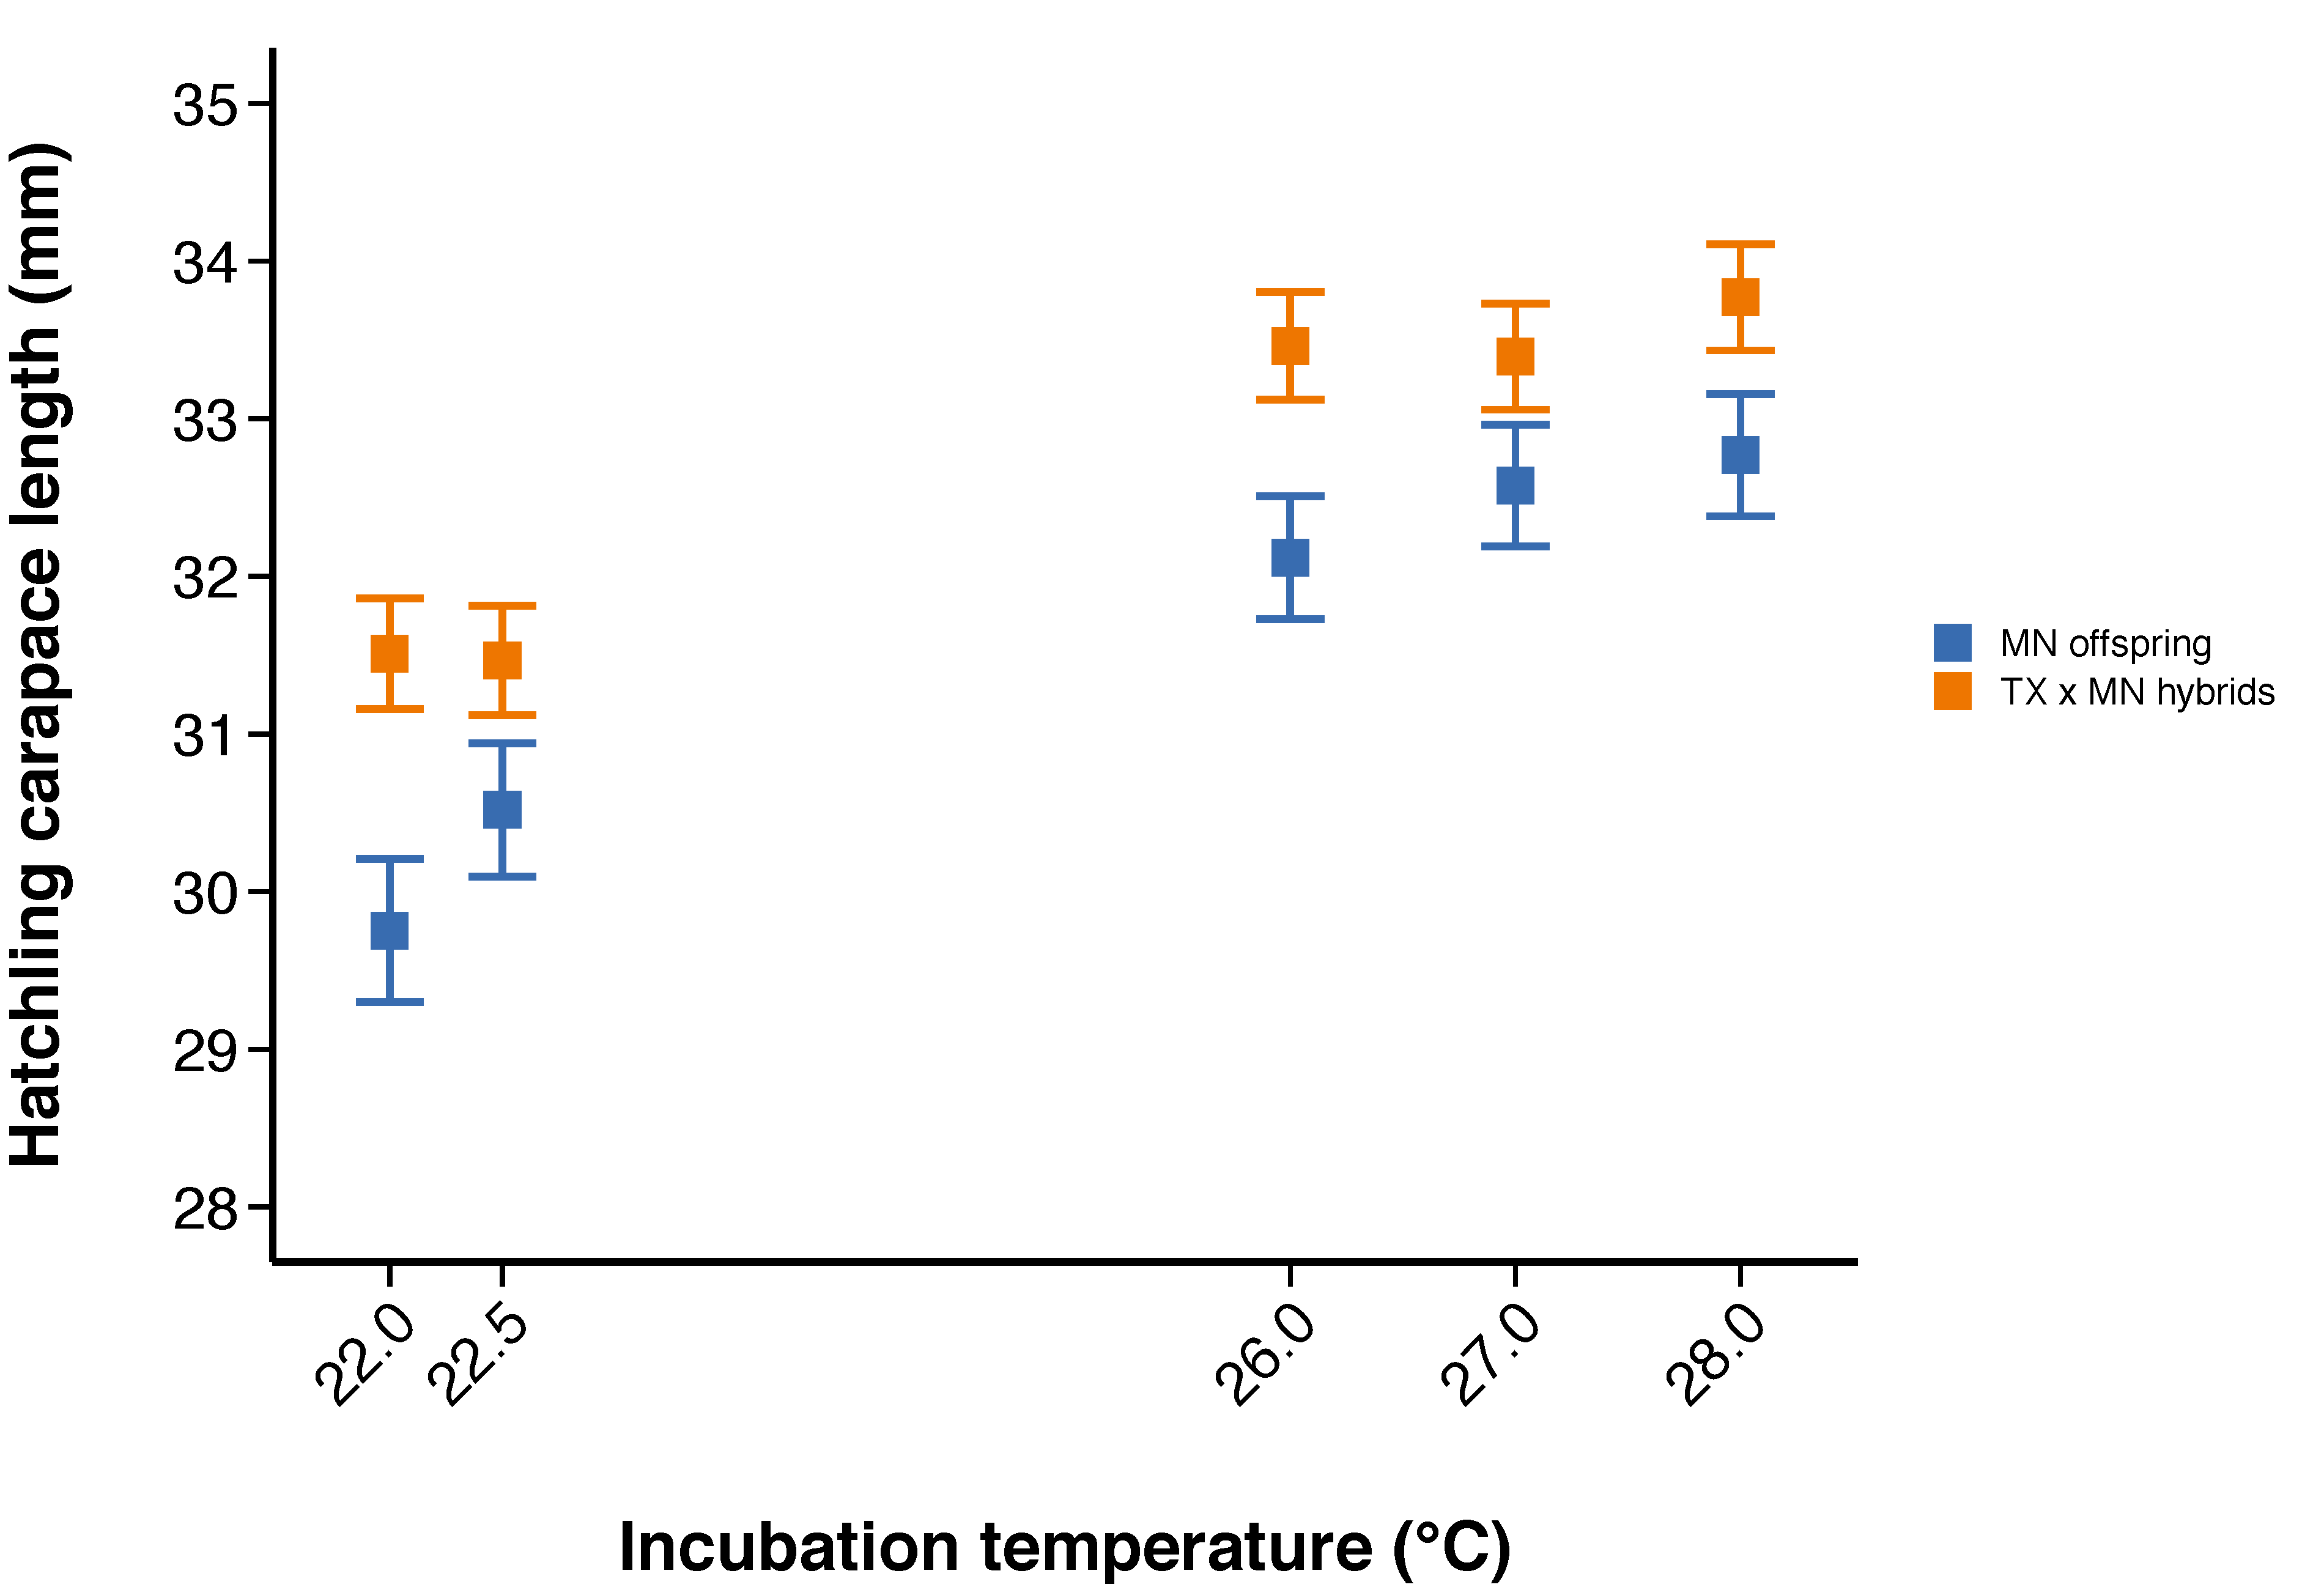

In [16]:
from IPython.display import Image
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/hatch_mass.png')

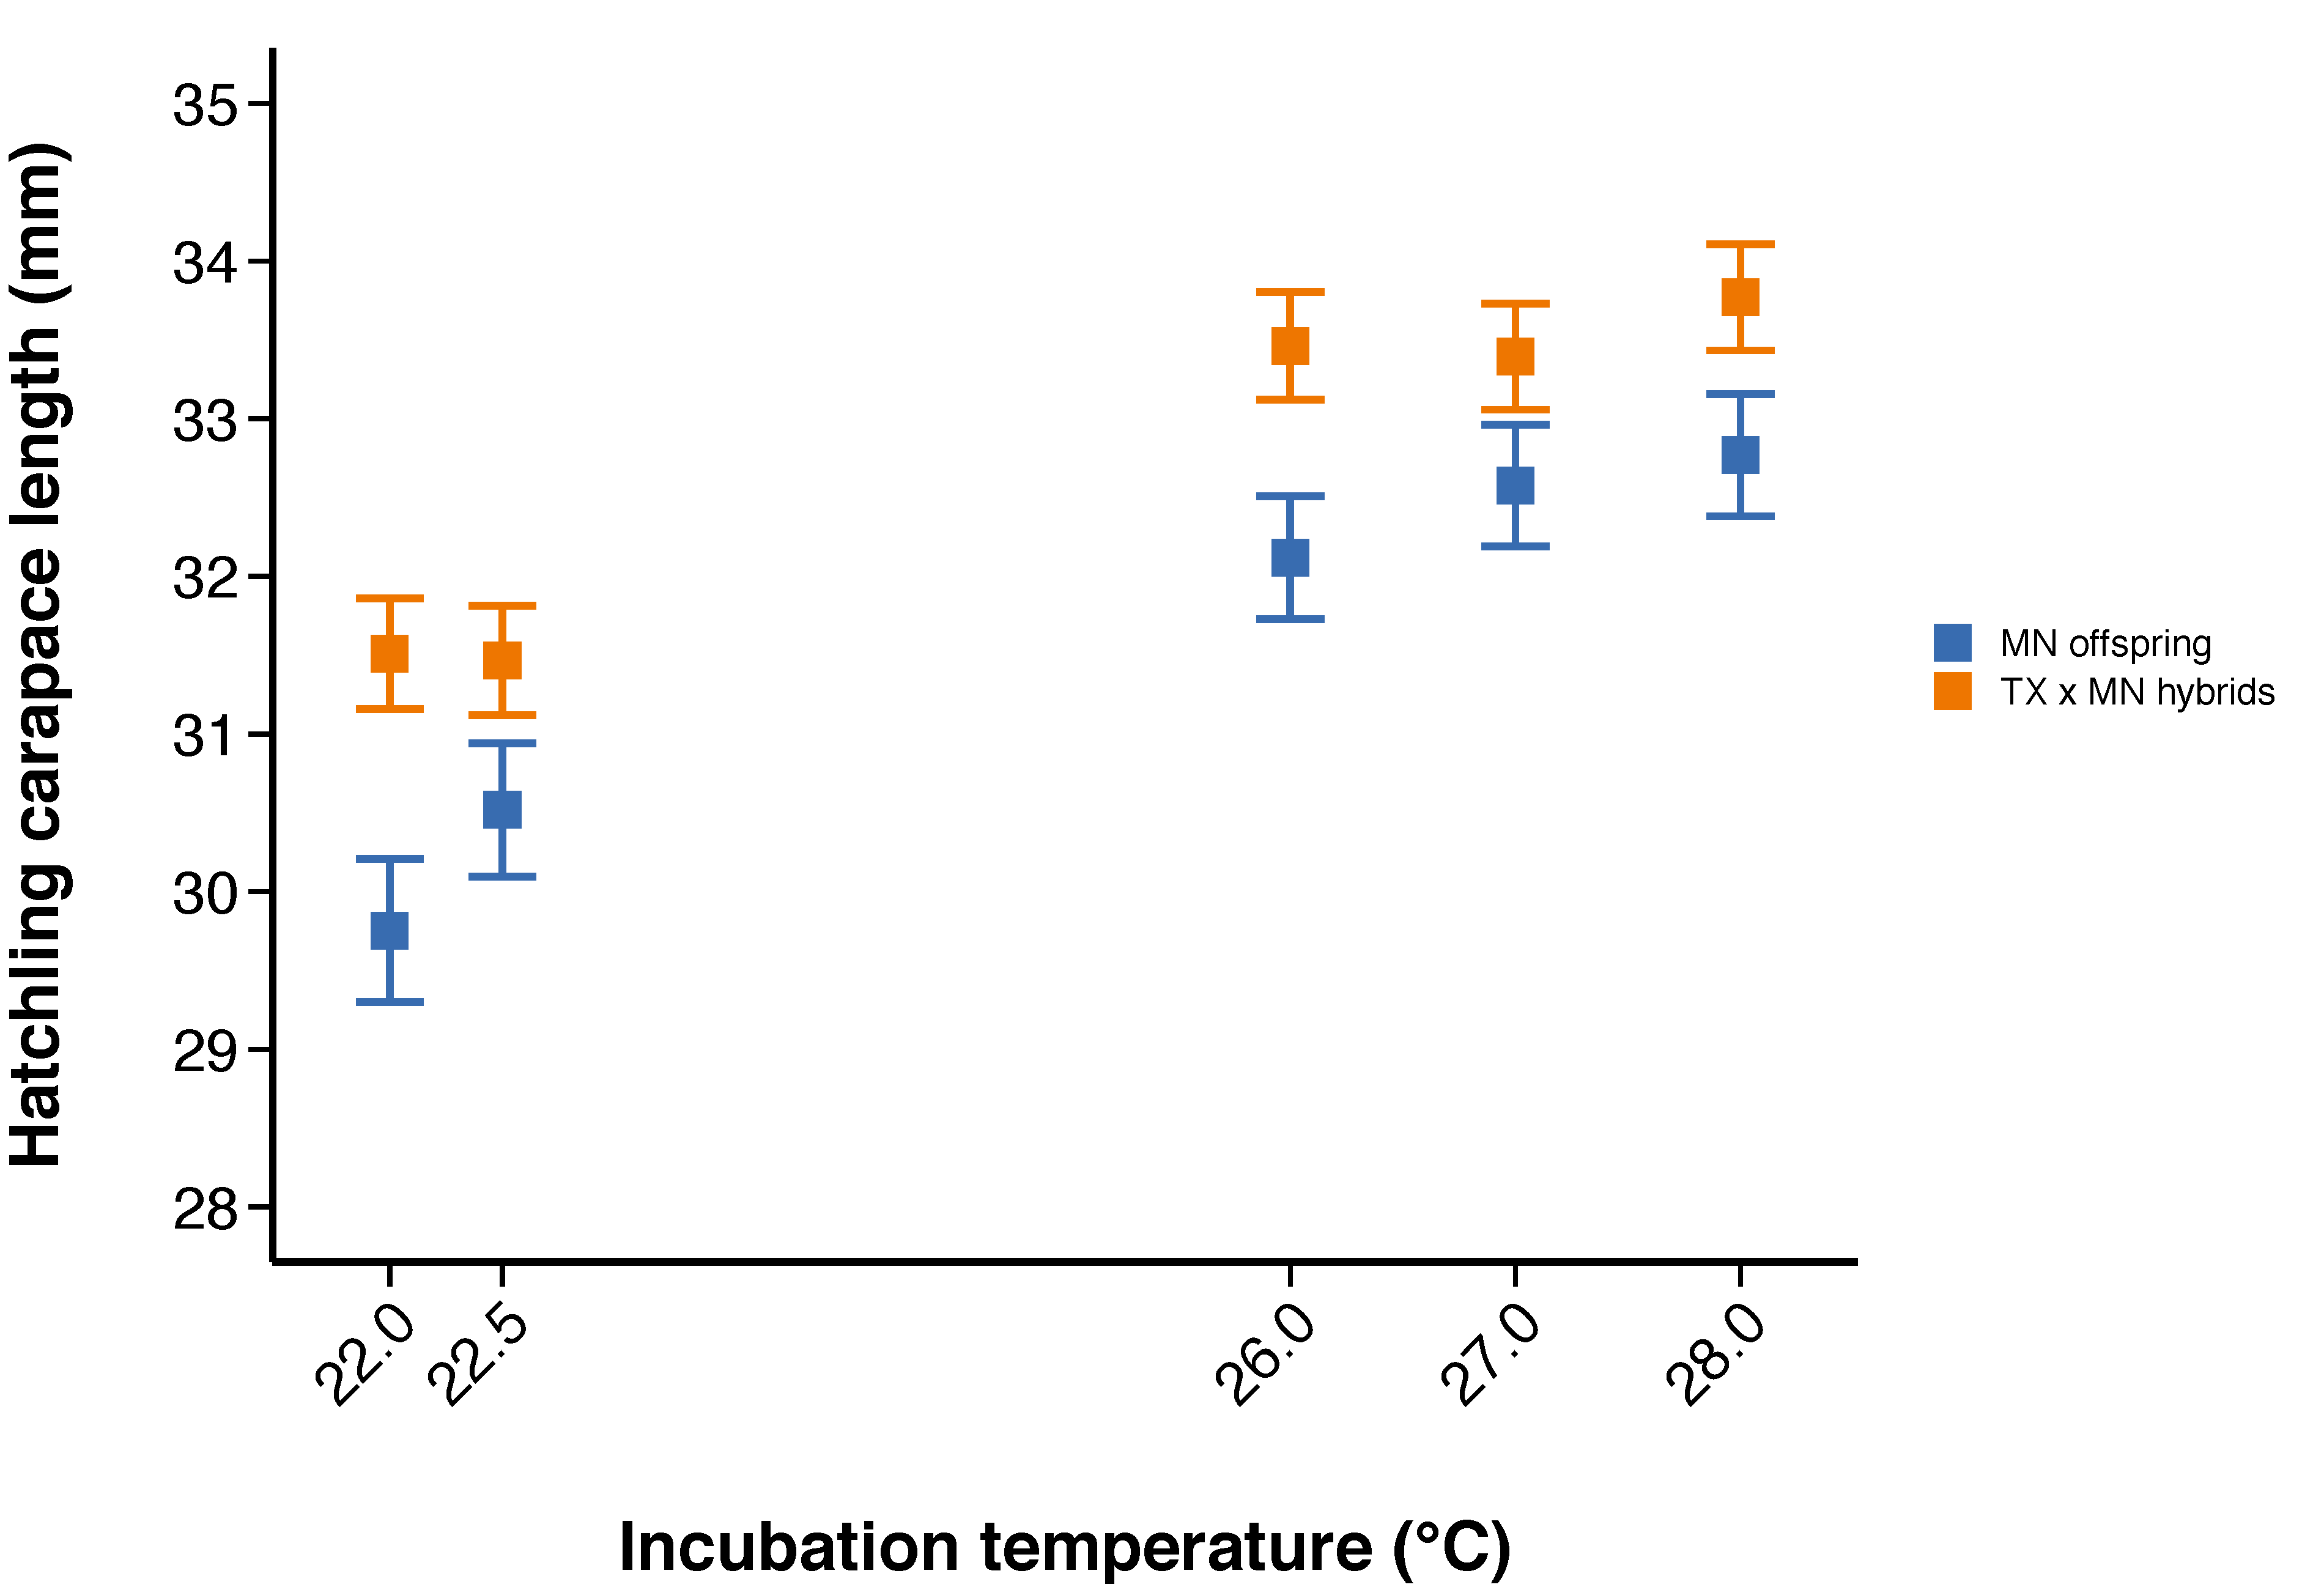

In [19]:
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/hatch_CL.png')

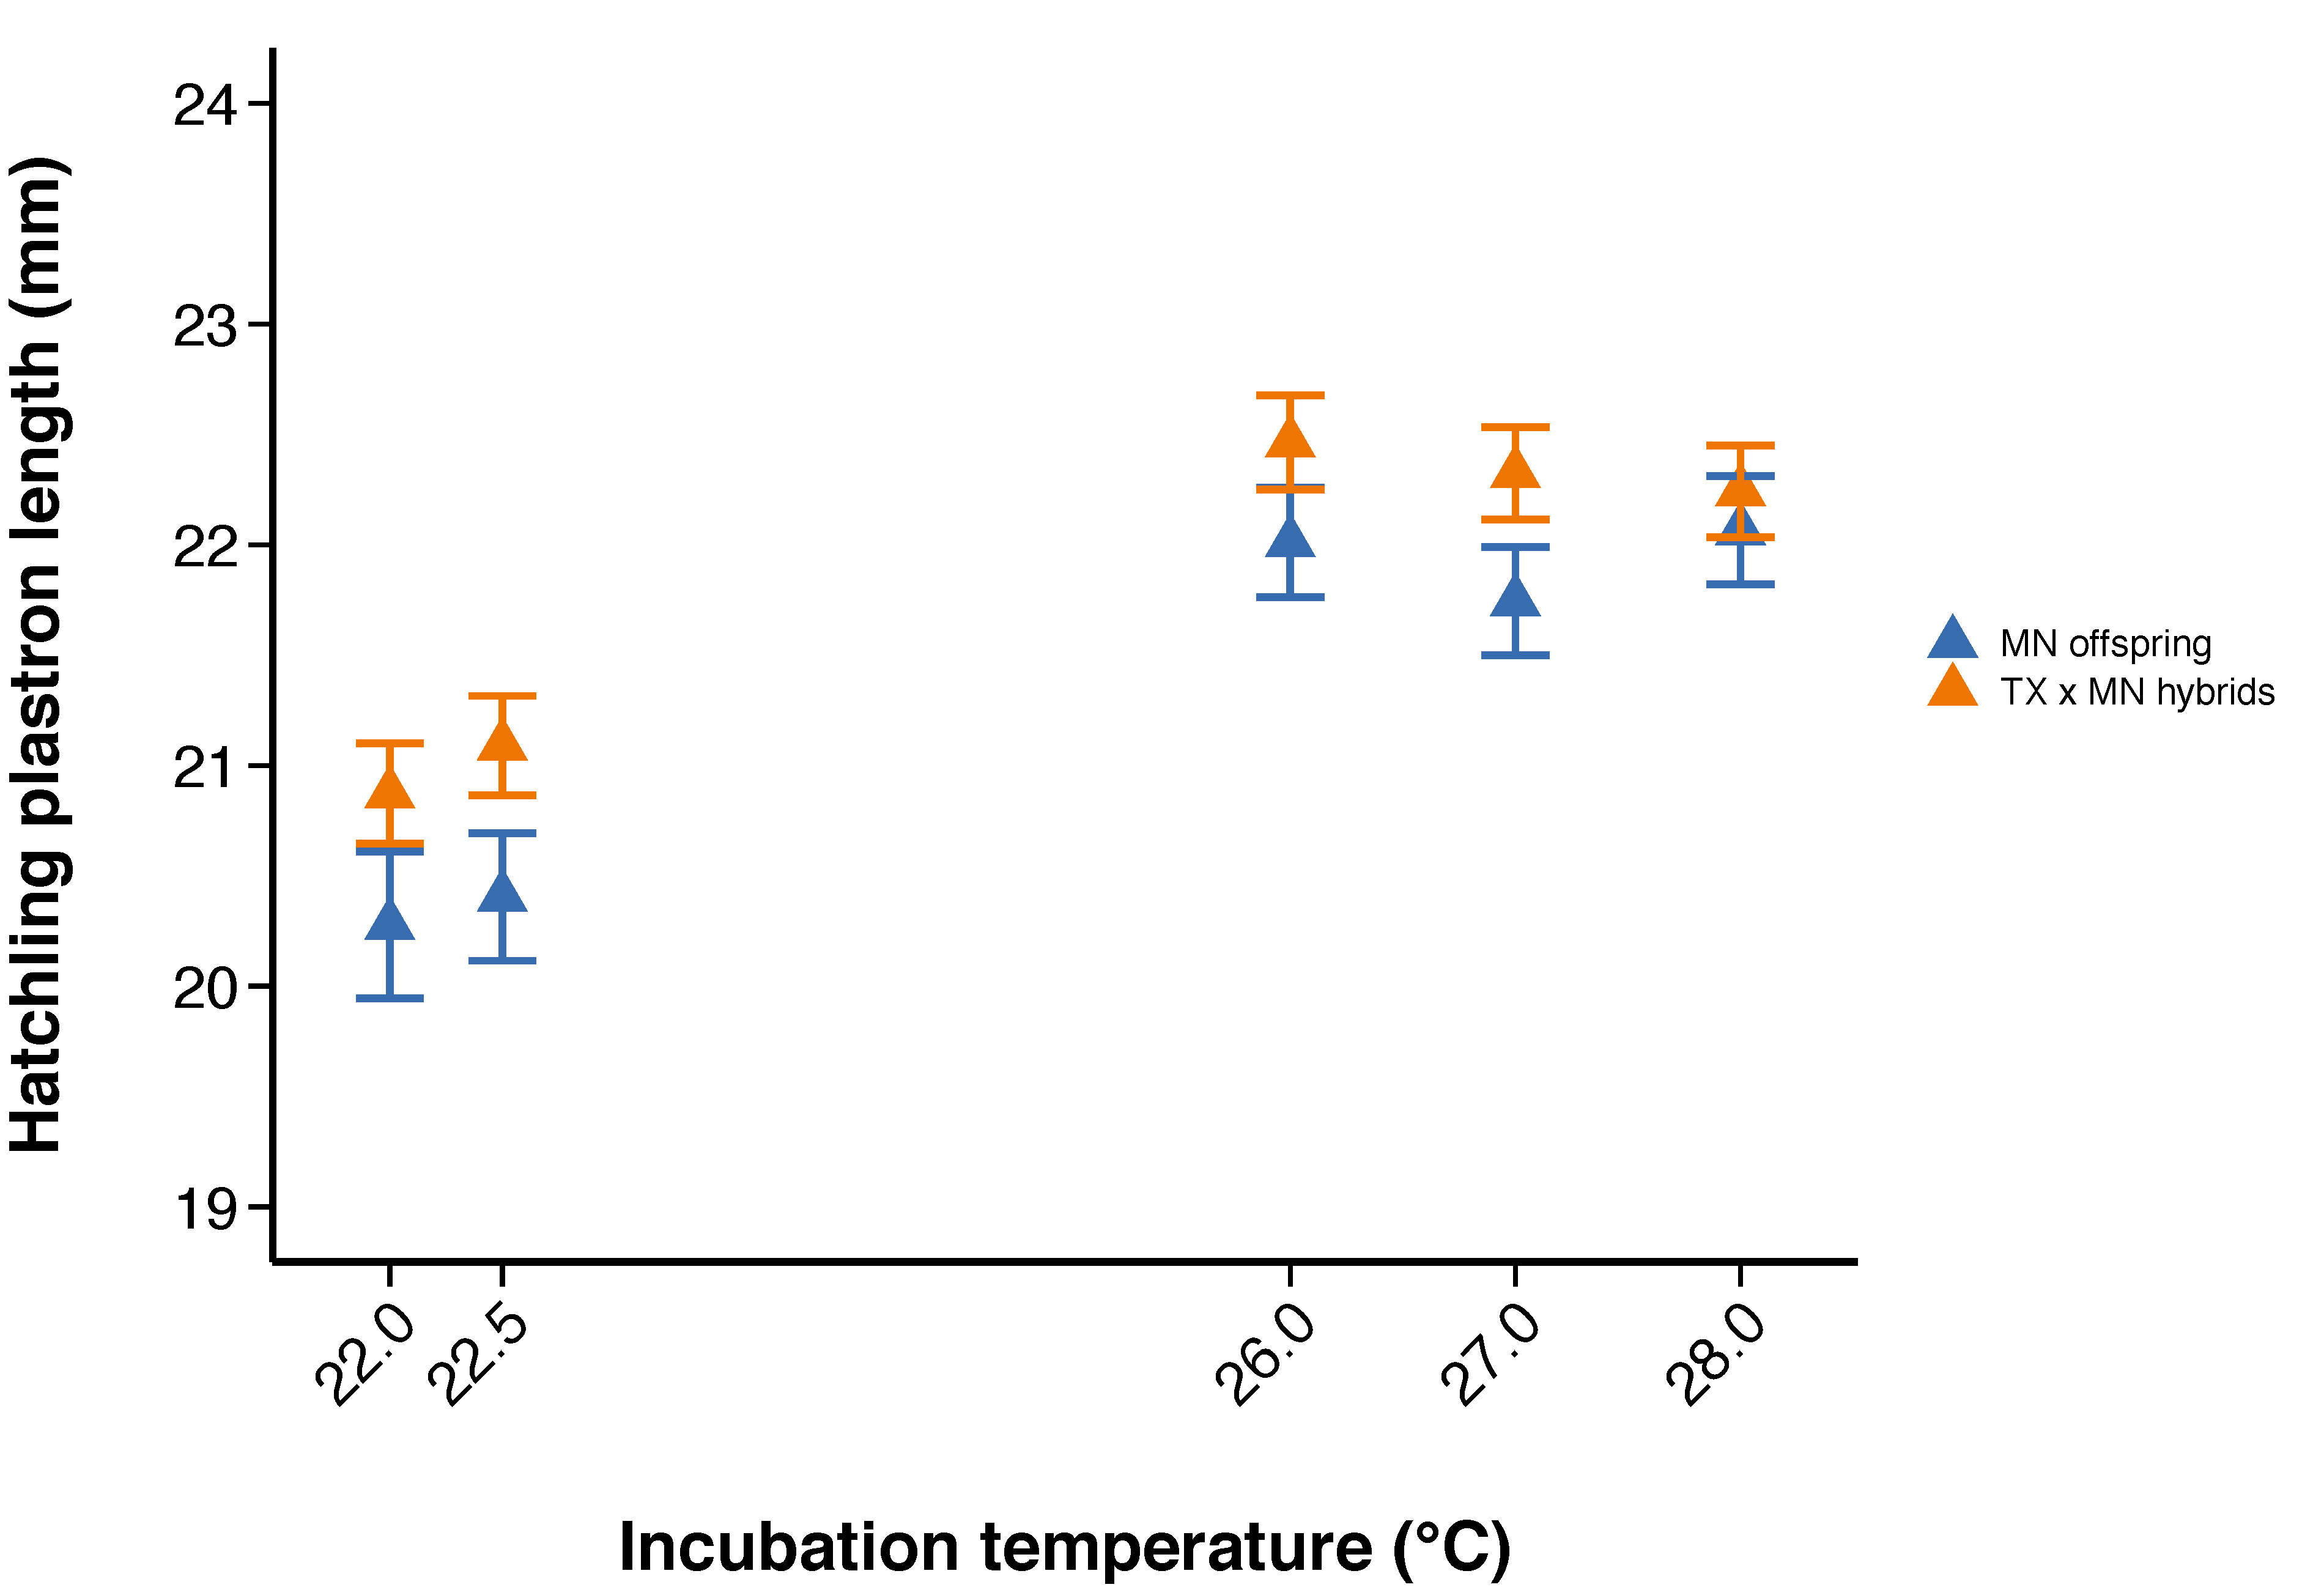

In [20]:
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/hatch_PL.png')

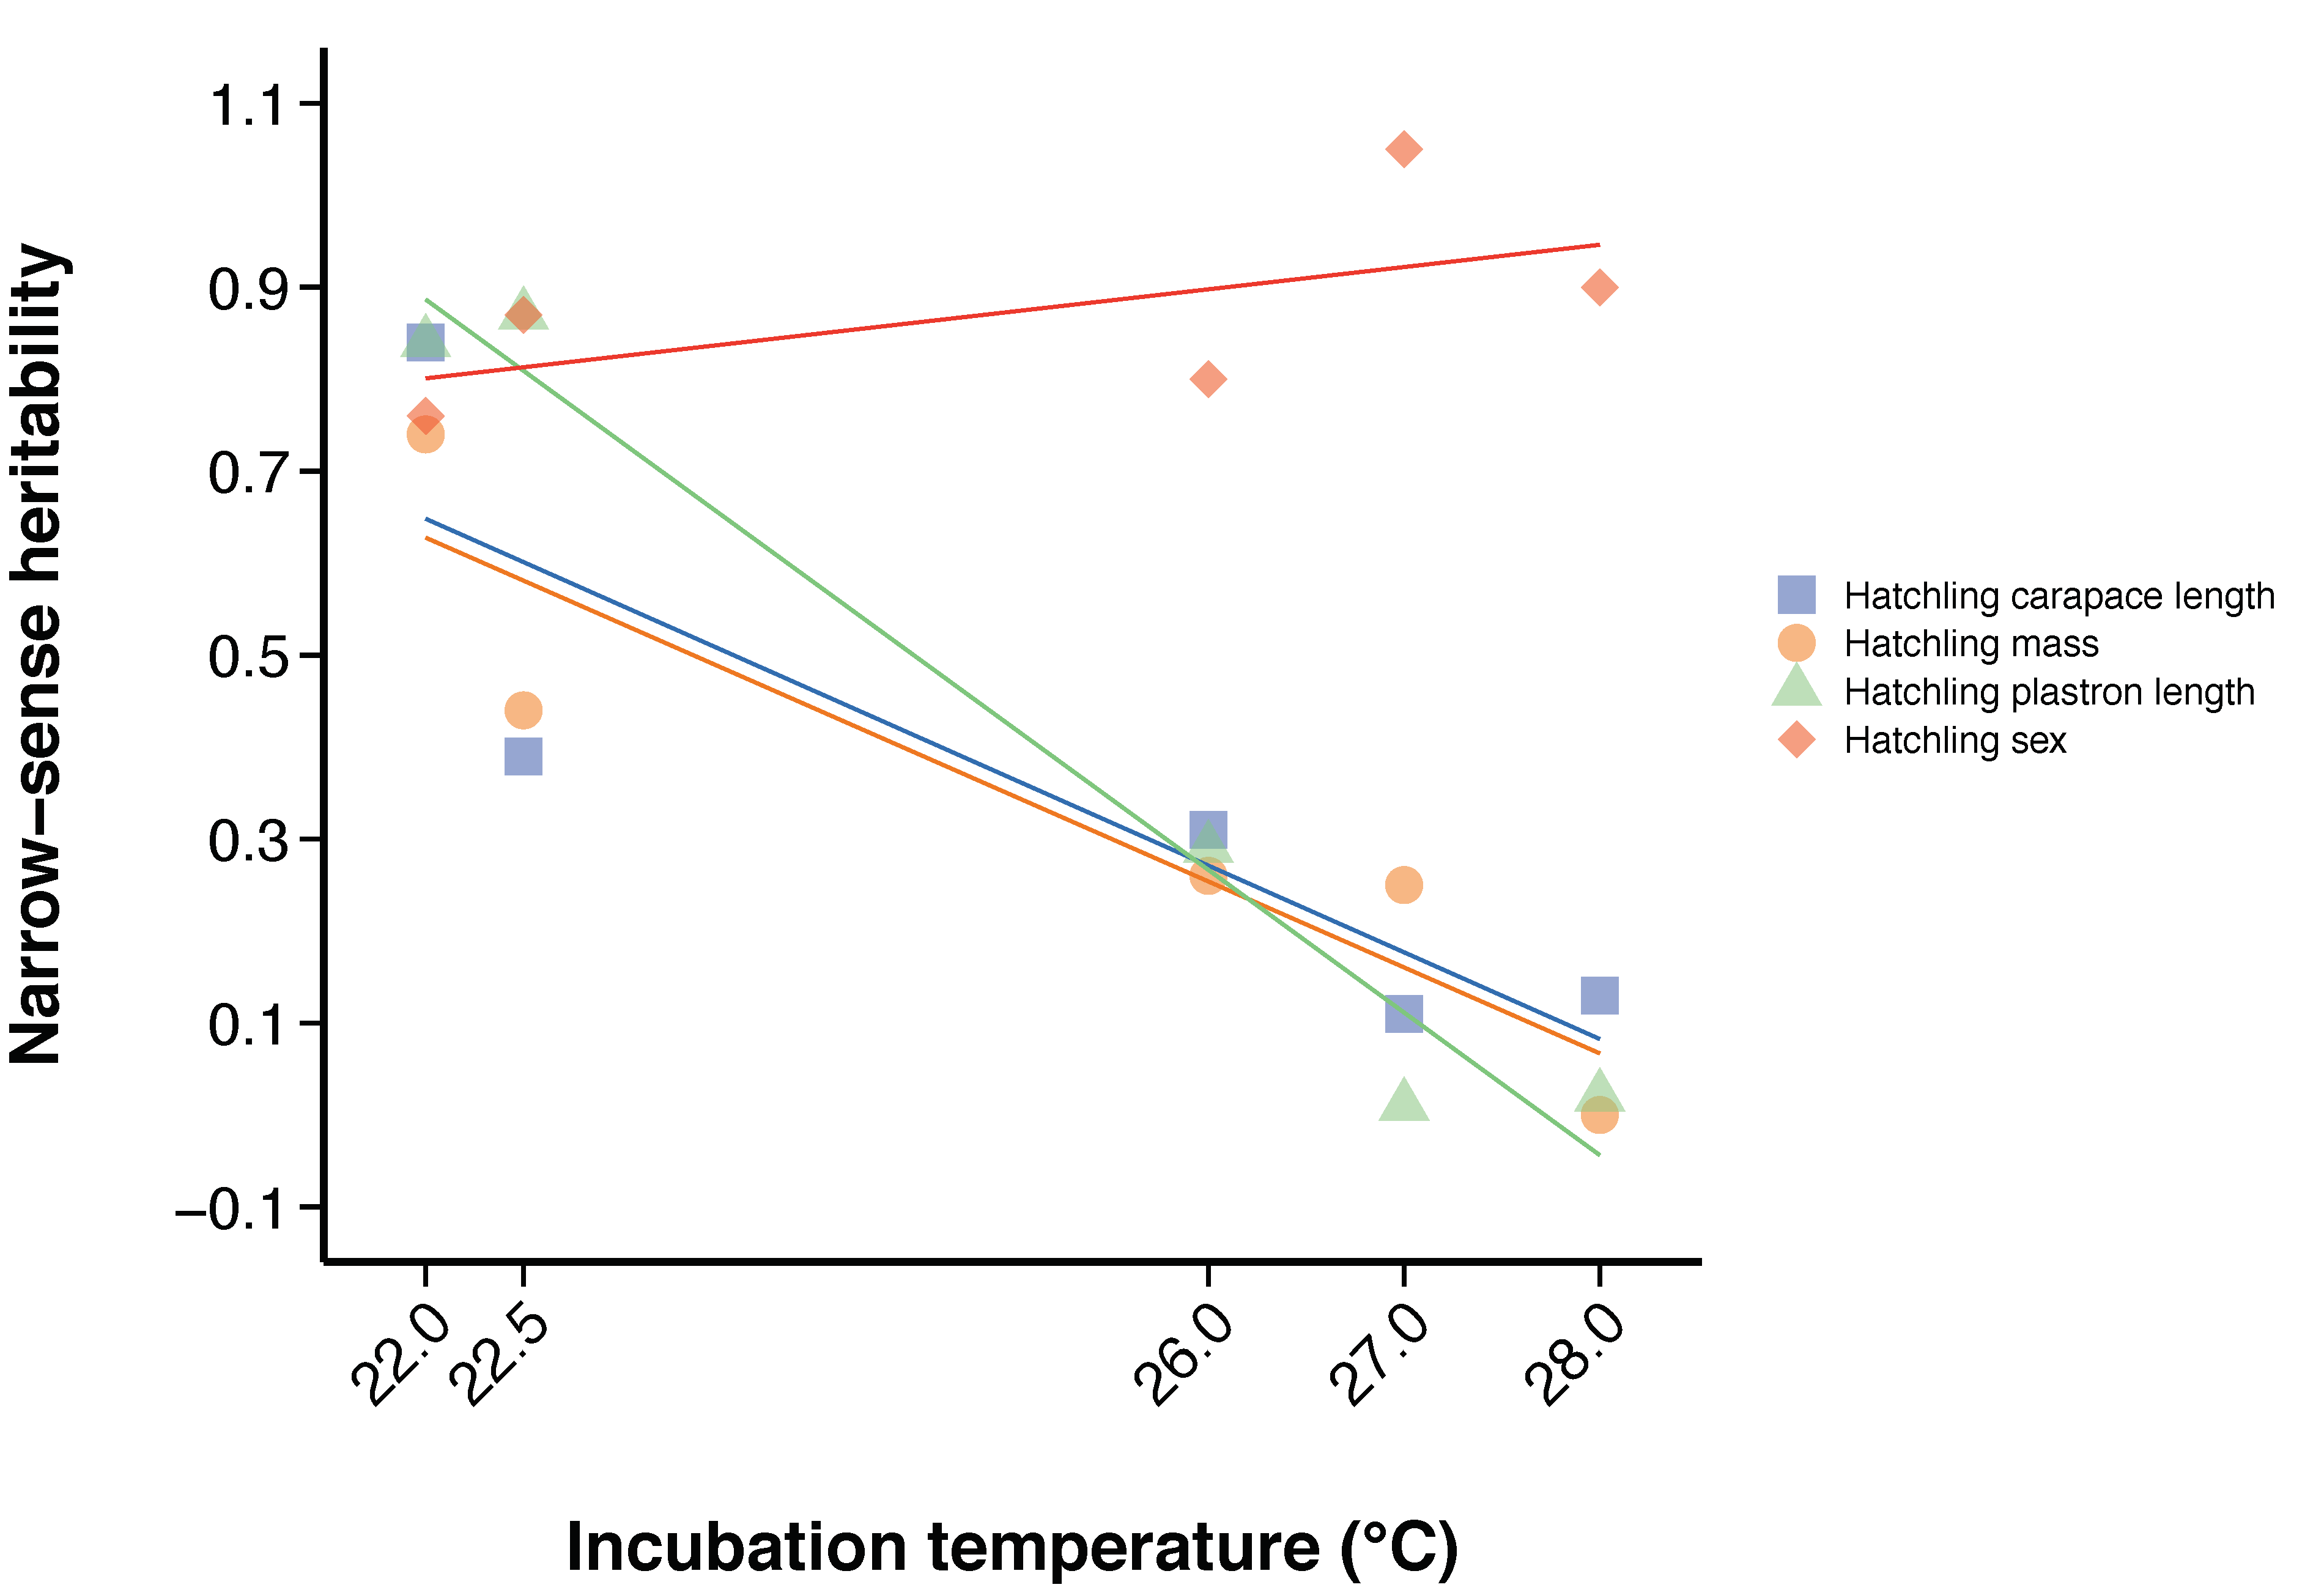

In [21]:
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/heritability.png')

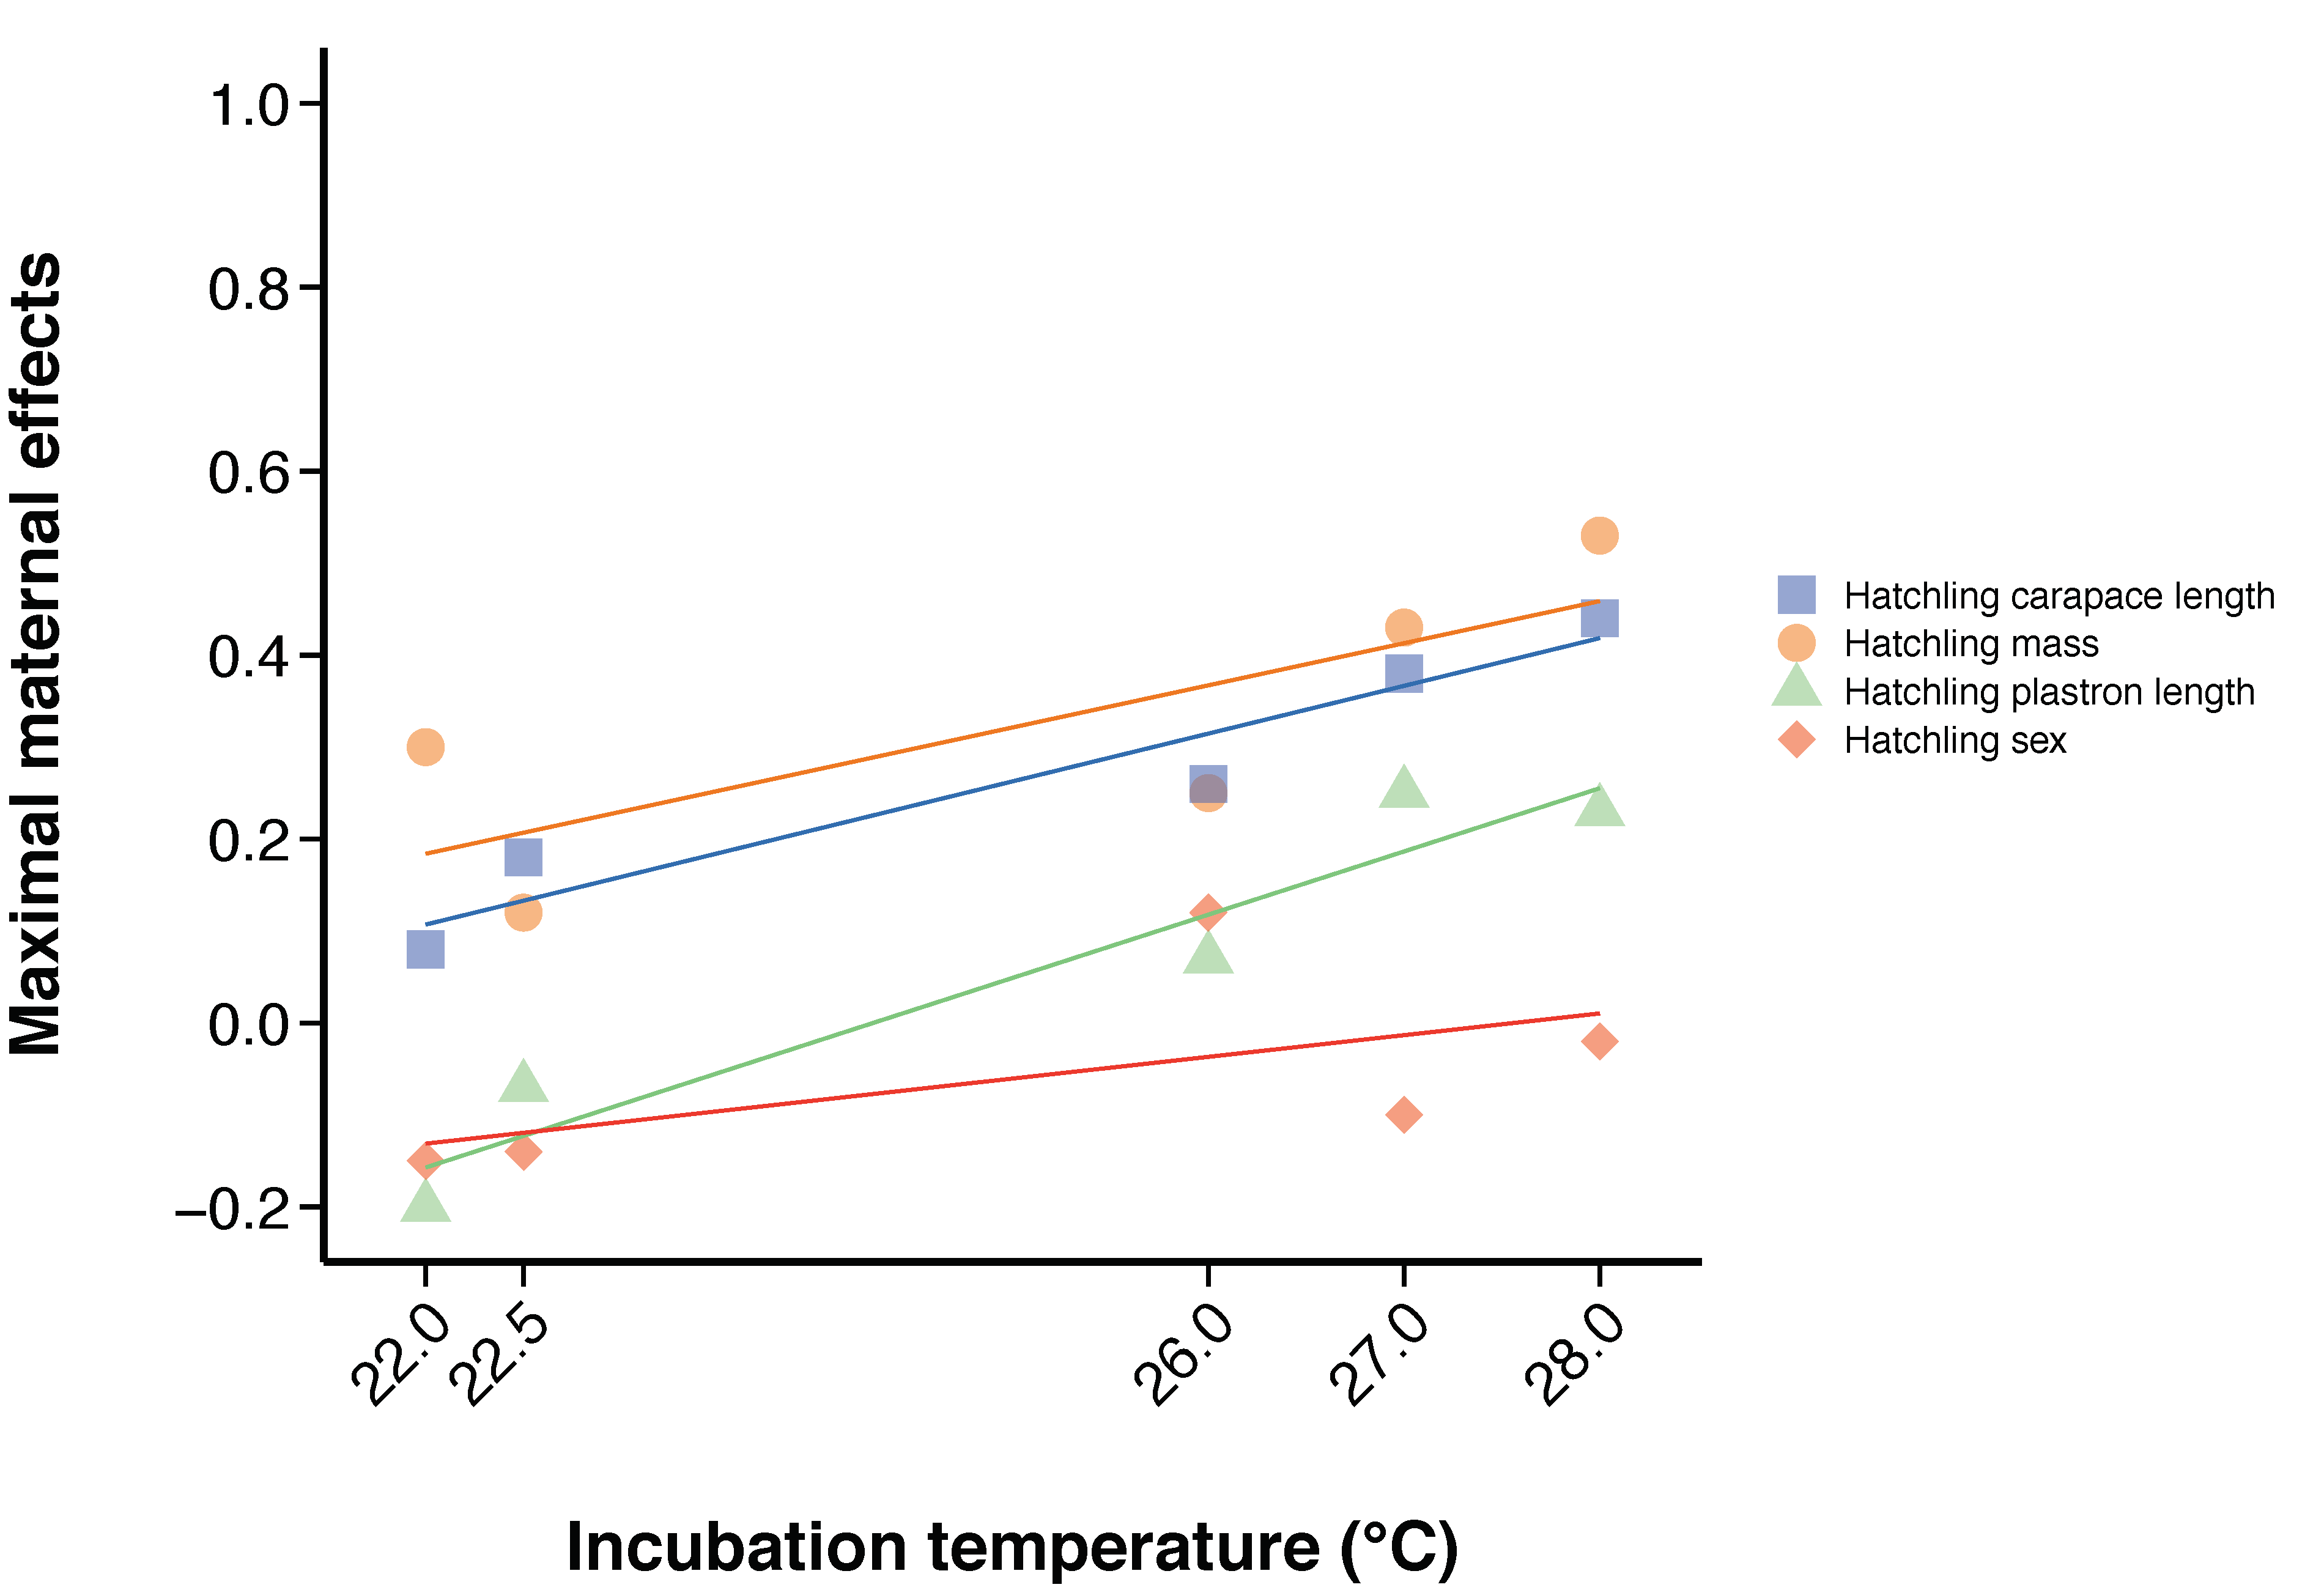

In [22]:
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/maternal_effects.png')

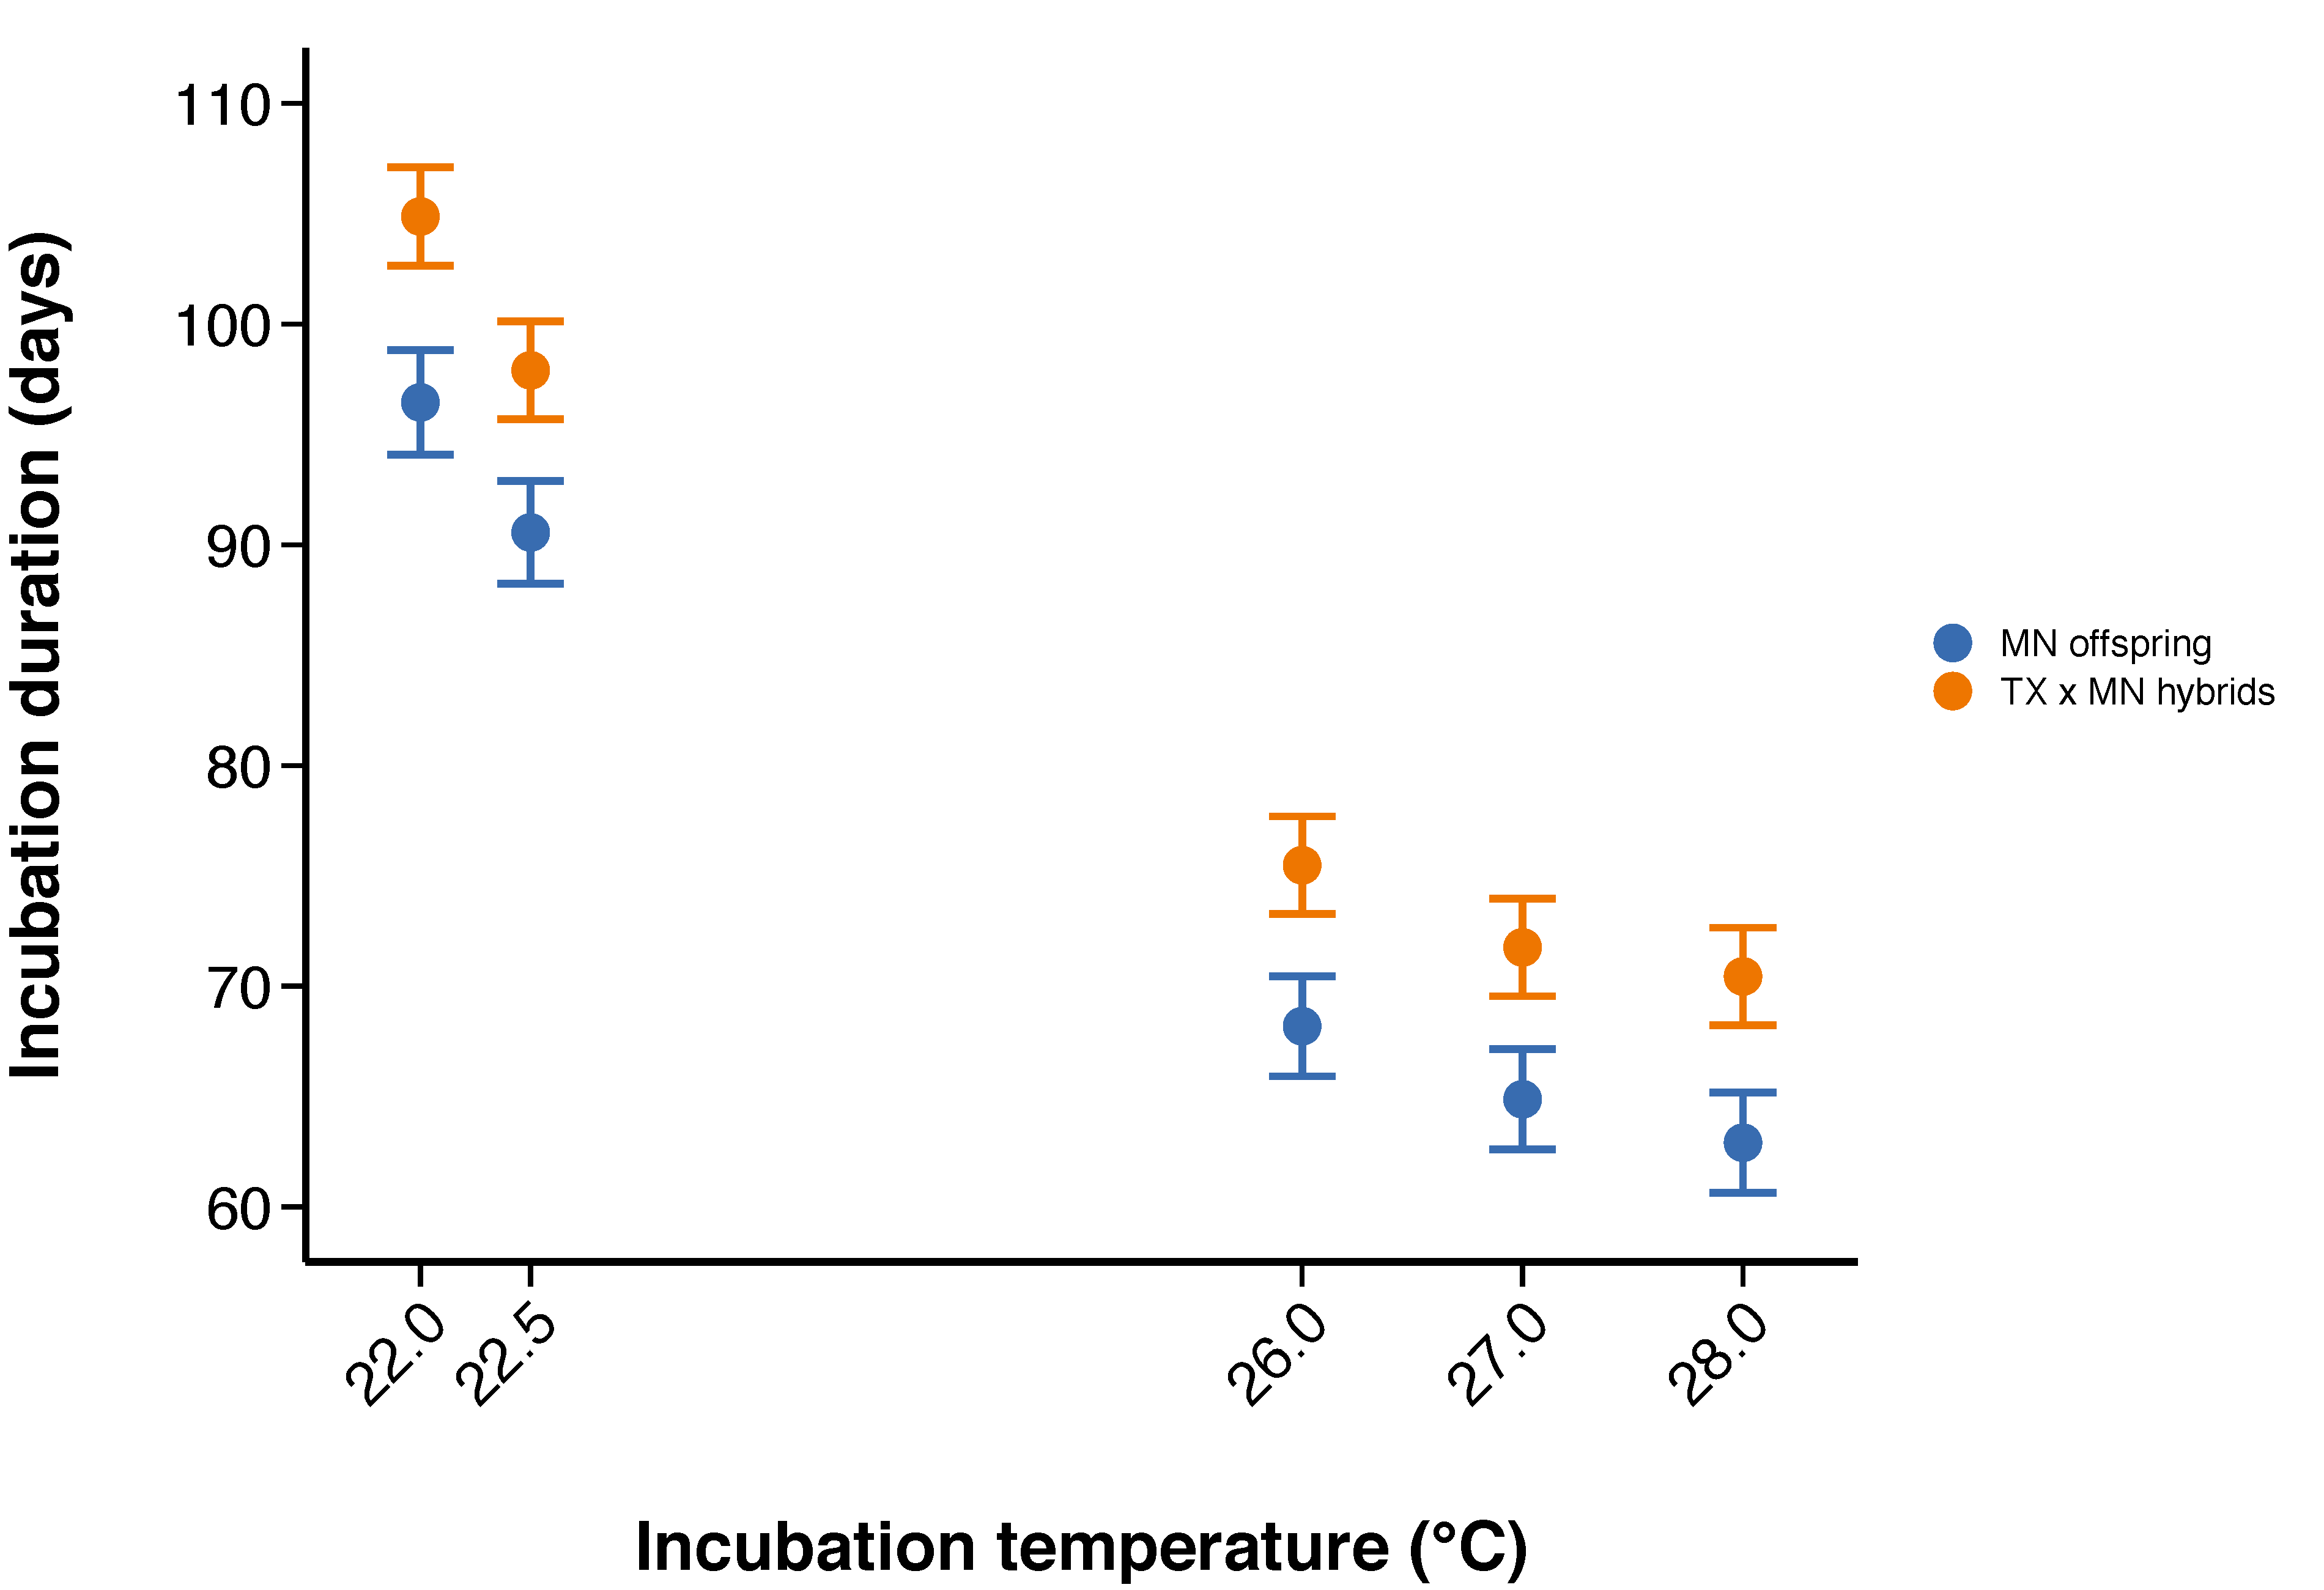

In [23]:
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/inc_dur.png')

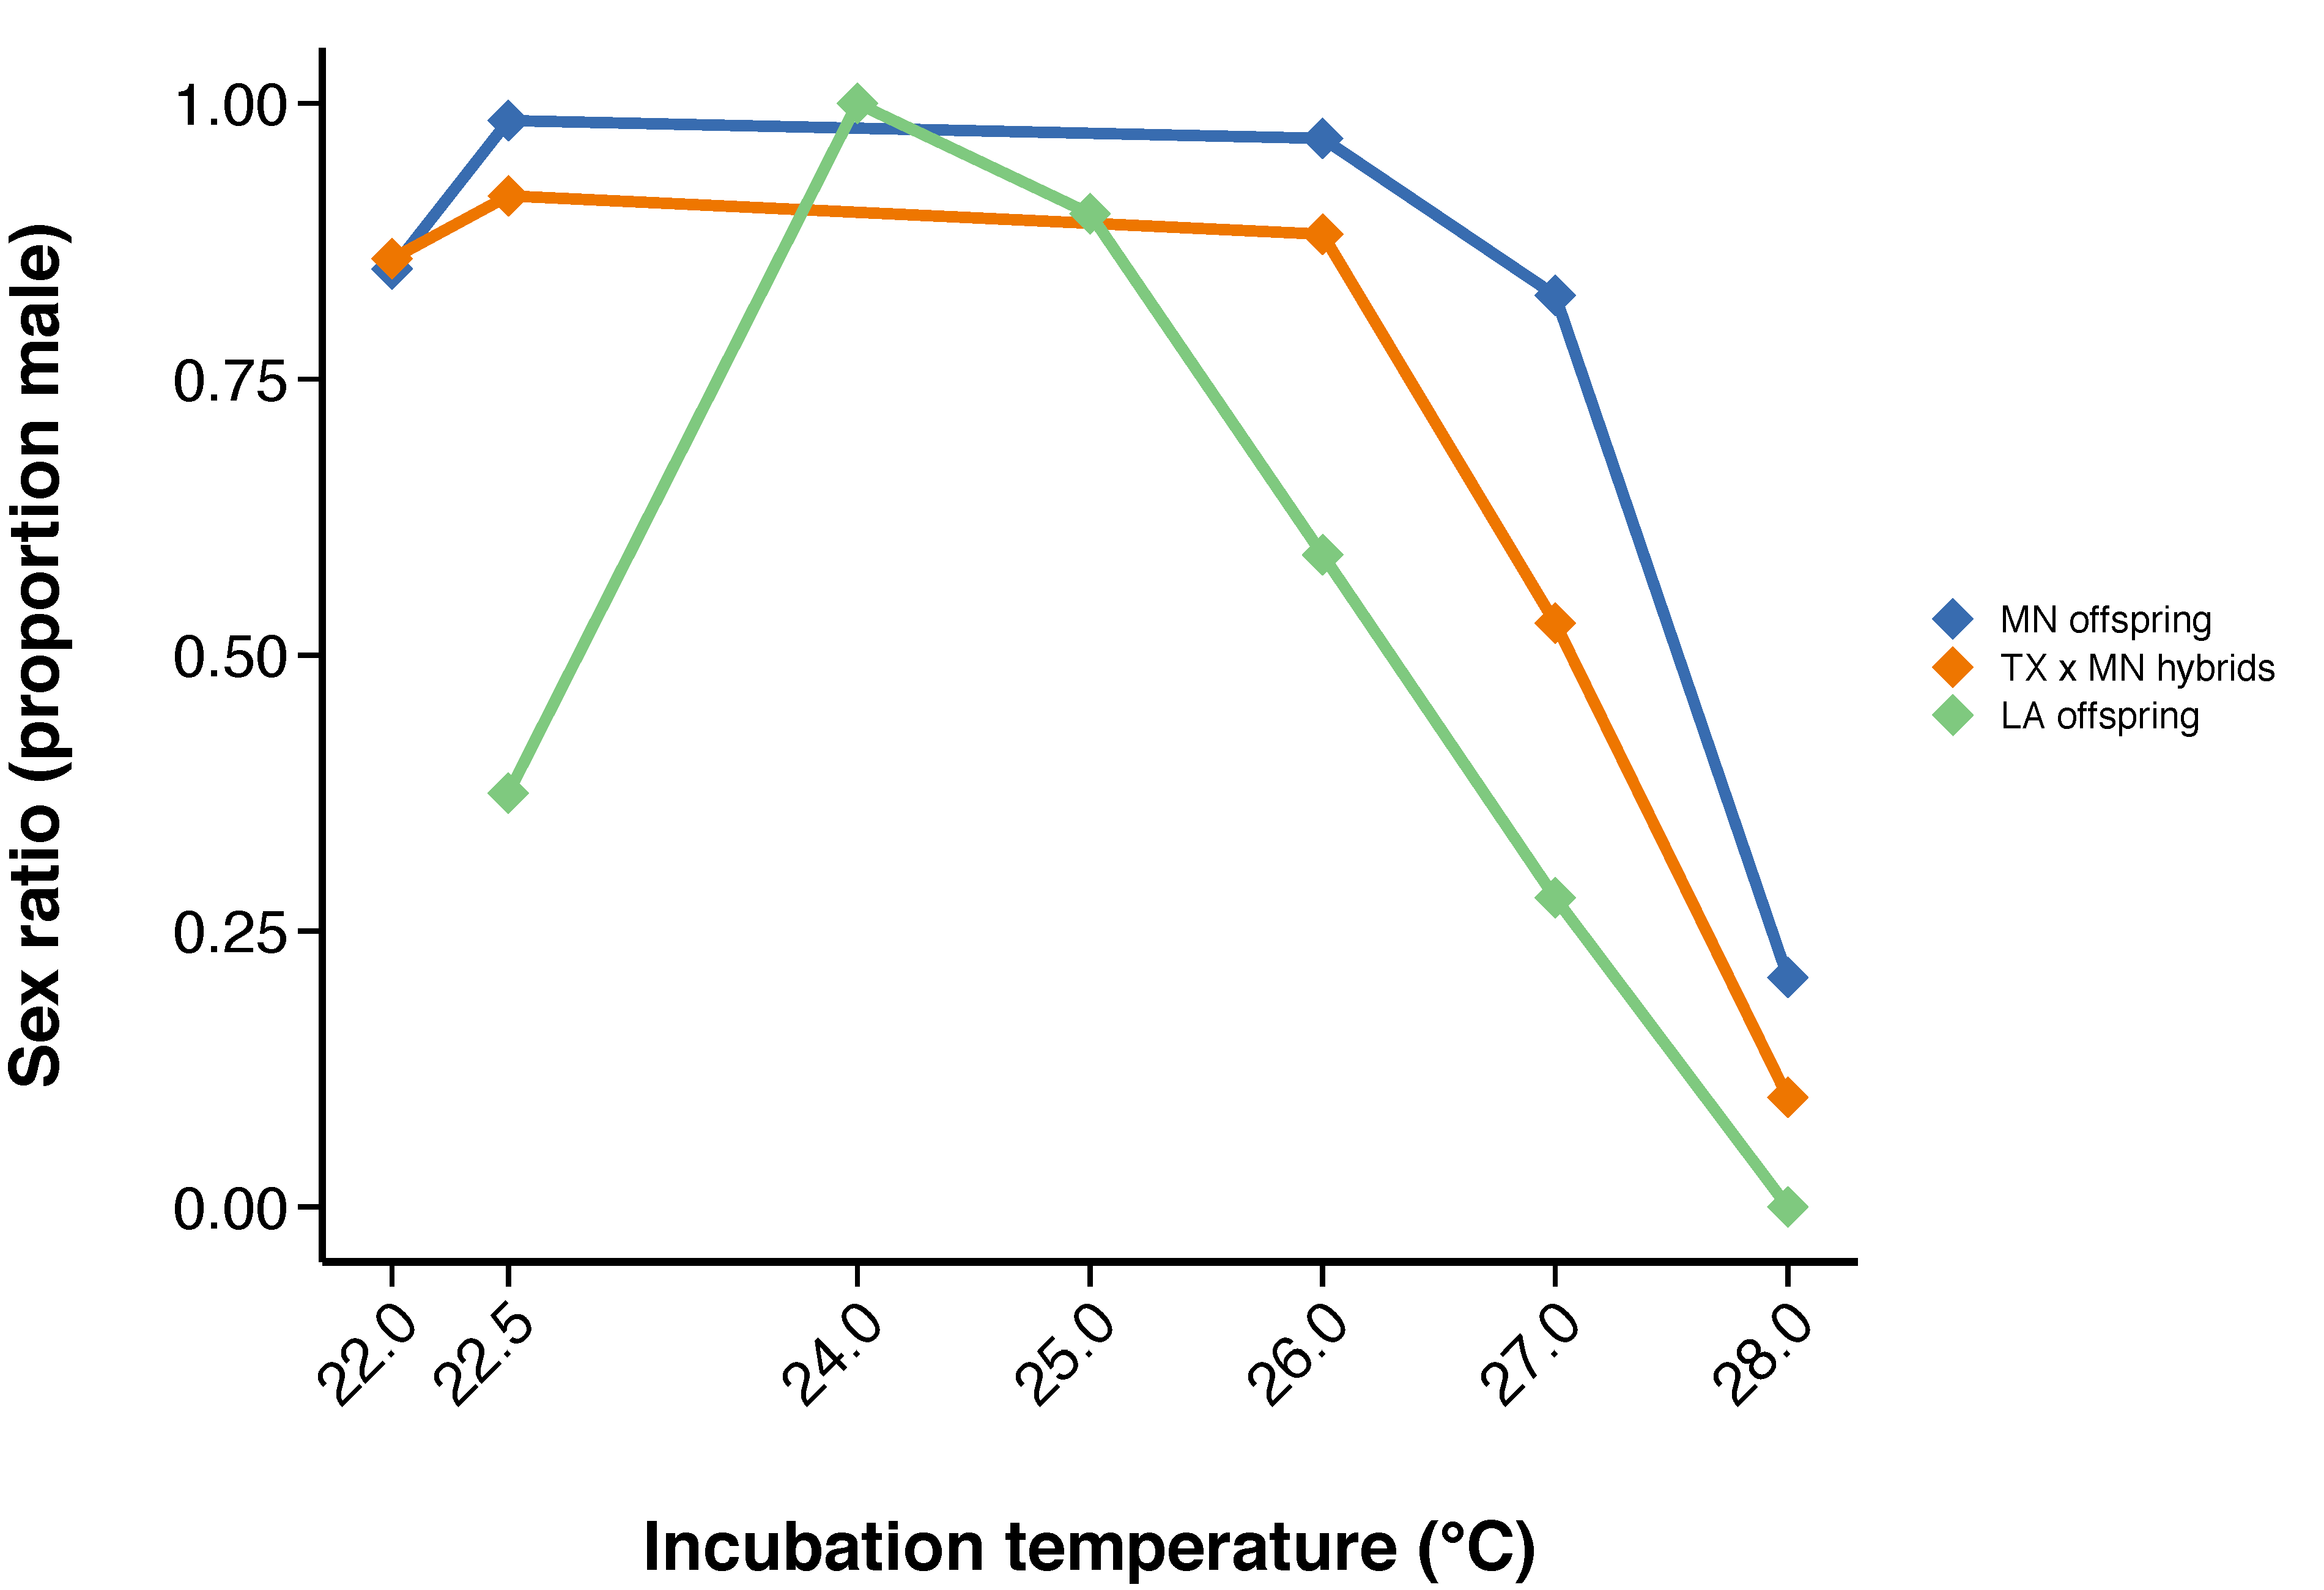

In [25]:
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/hybrid_rxn_norm.png')

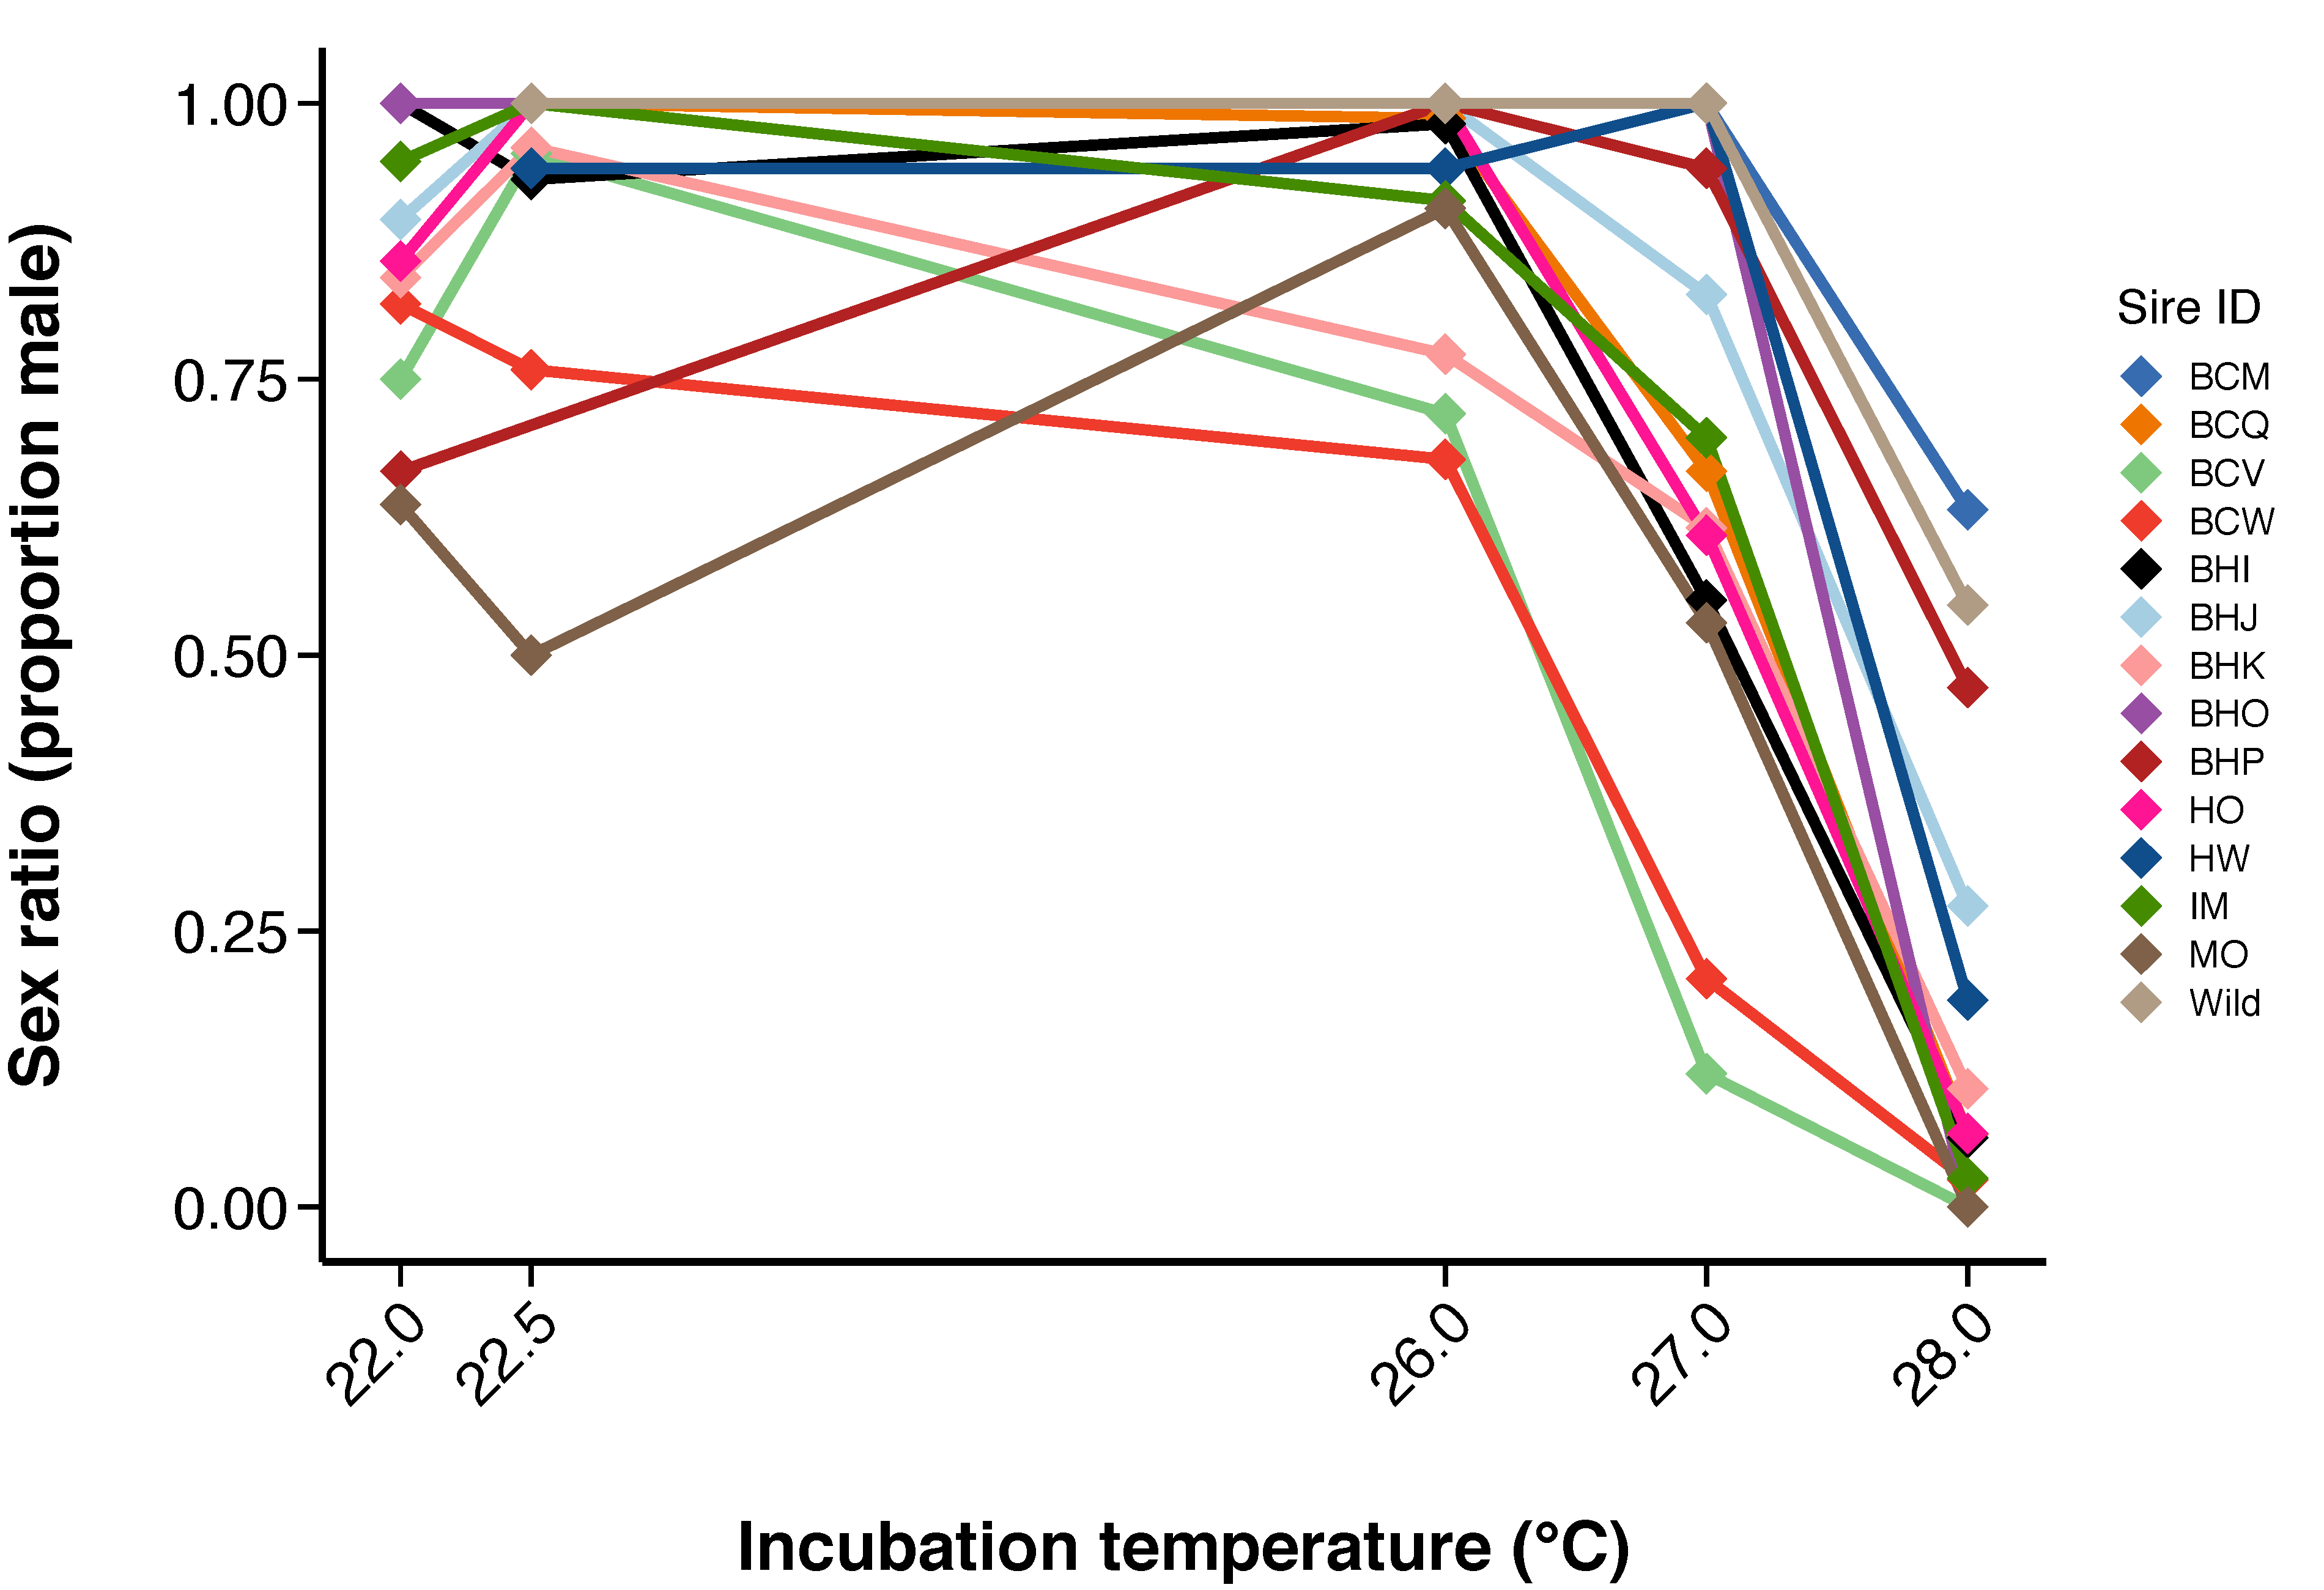

In [26]:
Image(filename='/Users/stoddert1/Documents/Kyle_code/images/sire_reaction_norm.png')